<a href="https://colab.research.google.com/github/ML-BDS-Group-06/employee-attrition-prediction/blob/main/Group_6_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np     
import pandas as pd    
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import roc_auc_score
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Read the HR employee attrition CSV dataset as dataframe
df = pd.read_csv("drive/My Drive/Colab Notebooks/Dataset/HR_Employee_Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Check the number of rows and columns
df.shape

(1470, 35)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'DailyRate'),
  Text(3, 0, 'DistanceFromHome'),
  Text(4, 0, 'Education'),
  Text(5, 0, 'EmployeeCount'),
  Text(6, 0, 'EmployeeNumber'),
  Text(7, 0, 'EnvironmentSatisfaction'),
  Text(8, 0, 'HourlyRate'),
  Text(9, 0, 'JobInvolvement'),
  Text(10, 0, 'JobLevel'),
  Text(11, 0, 'JobSatisfaction'),
  Text(12, 0, 'MonthlyIncome'),
  Text(13, 0, 'MonthlyRate'),
  Text(14, 0, 'NumCompaniesWorked'),
  Text(15, 0, 'PercentSalaryHike'),
  Text(16, 0, 'PerformanceRating'),
  Text(17, 0, 'RelationshipSatisfaction'),
  Text(18, 0, 'StandardHours'),
  Text(19, 0, 'StockOptionLevel'),
  Text(20, 0, 'TotalWorkingYears'),
  Text(21, 0, 'TrainingTimesLastYear'),
  Text(22, 0, 'WorkLifeBalance'),
  Text(23, 0, 'YearsAtCompany'),
  Text(24, 0, 'YearsInCurrentRole'),
  Text(25, 0, 'YearsSinceLastPromotion'),
  Text(26, 0, 'YearsWithCurrManager')])

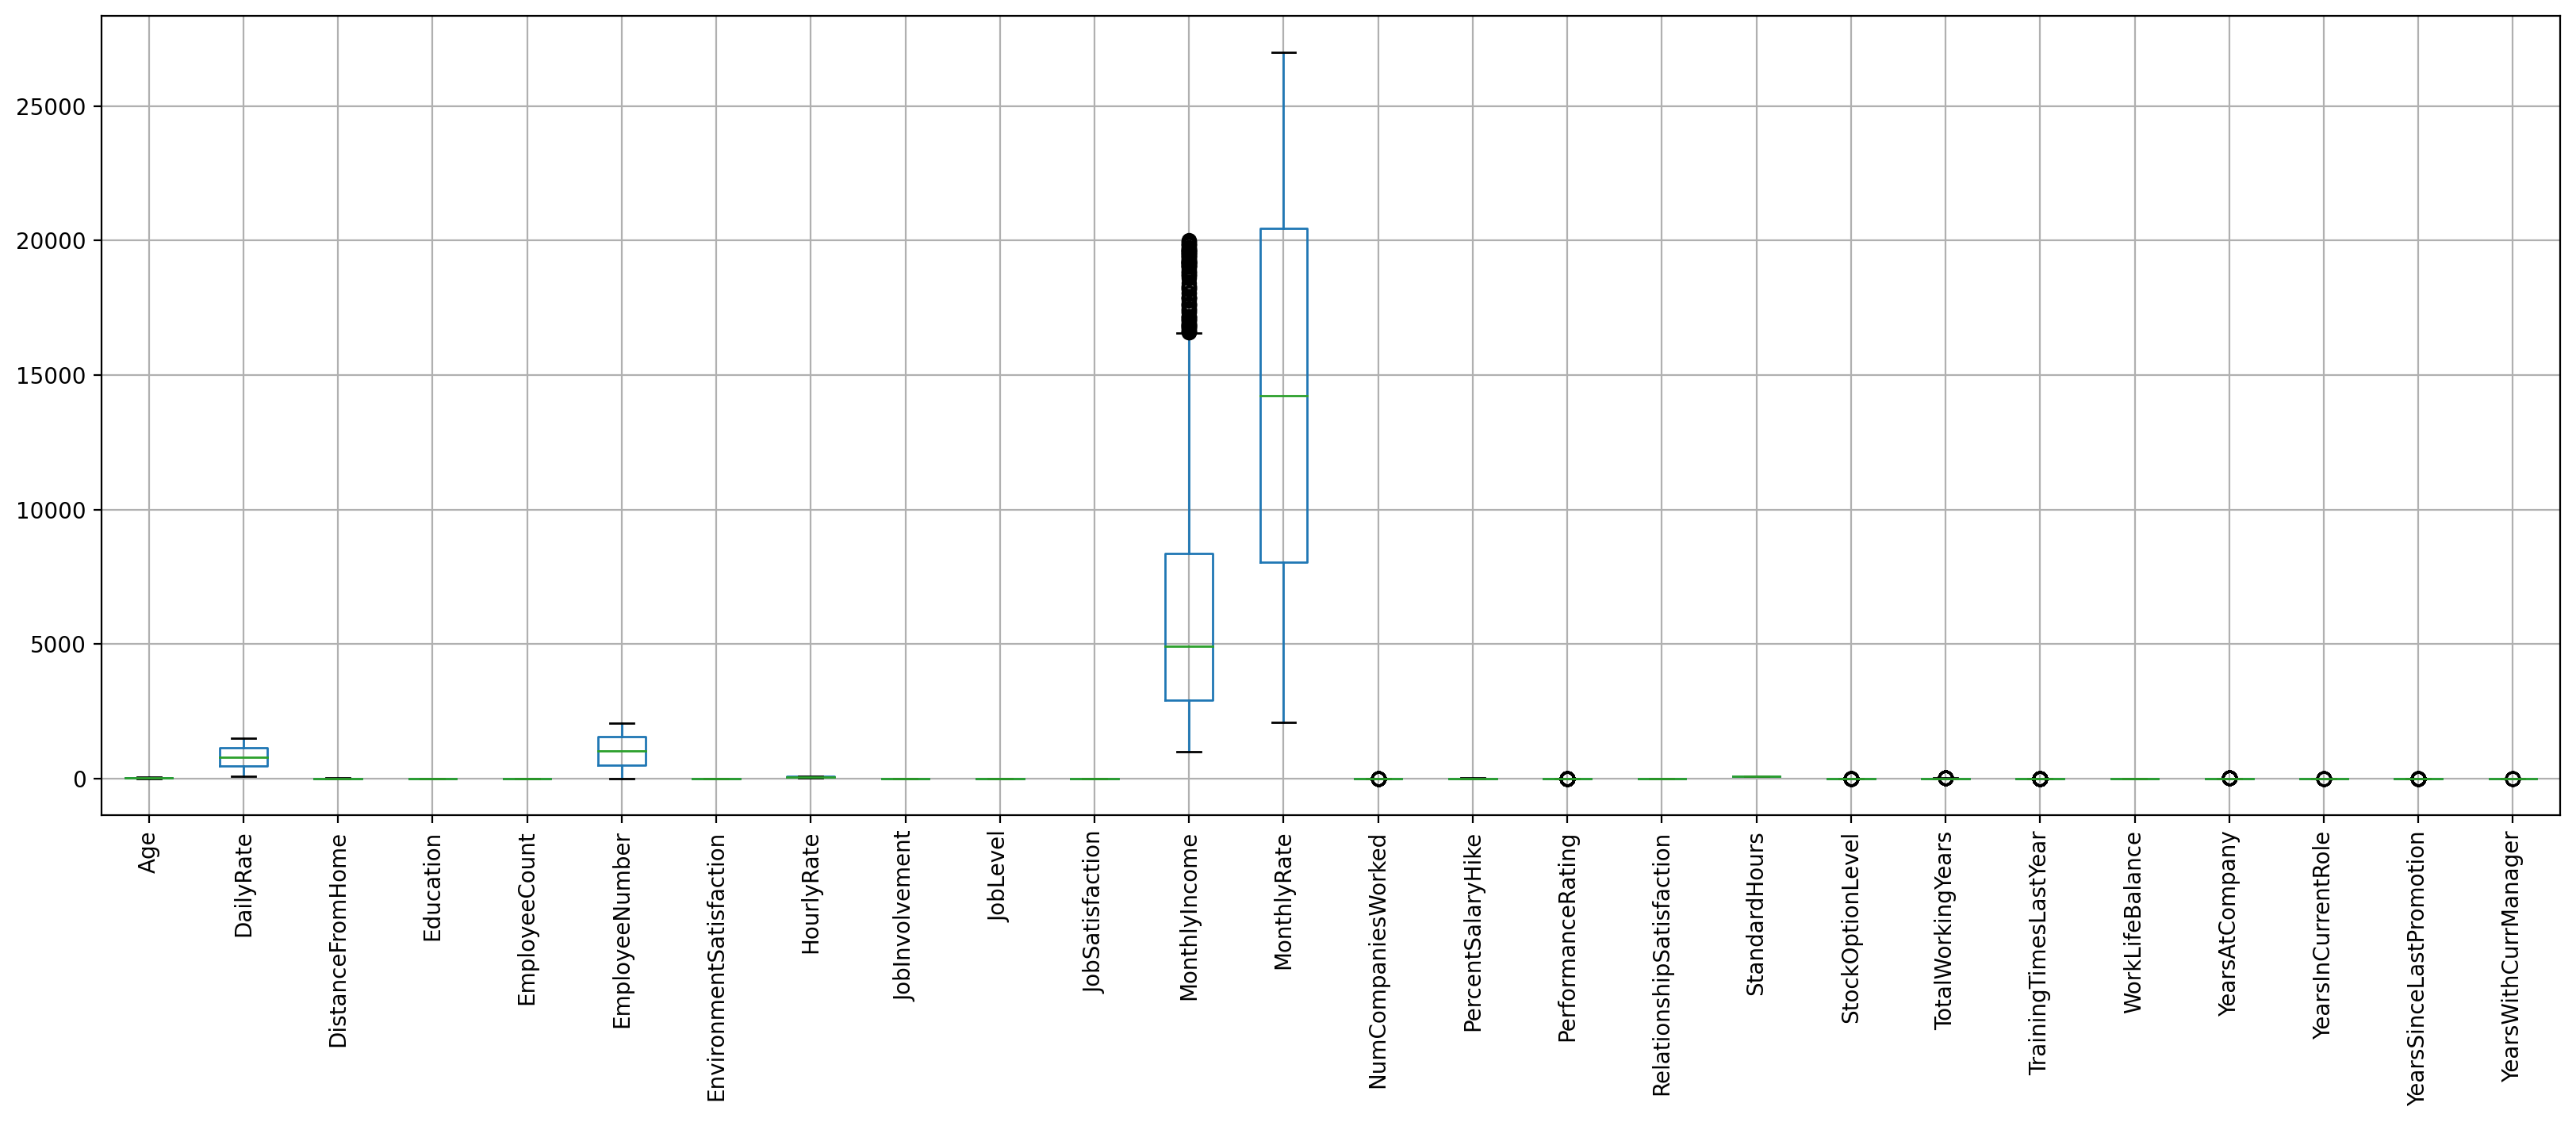

In [5]:
#Create the boxplot
df.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)

**Removing outliers**

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(1, 0, 'Age'),
  Text(2, 0, 'DailyRate'),
  Text(3, 0, 'DistanceFromHome'),
  Text(4, 0, 'Education'),
  Text(5, 0, 'EmployeeCount'),
  Text(6, 0, 'EmployeeNumber'),
  Text(7, 0, 'EnvironmentSatisfaction'),
  Text(8, 0, 'HourlyRate'),
  Text(9, 0, 'JobInvolvement'),
  Text(10, 0, 'JobLevel'),
  Text(11, 0, 'JobSatisfaction'),
  Text(12, 0, 'MonthlyIncome'),
  Text(13, 0, 'MonthlyRate'),
  Text(14, 0, 'NumCompaniesWorked'),
  Text(15, 0, 'PercentSalaryHike'),
  Text(16, 0, 'PerformanceRating'),
  Text(17, 0, 'RelationshipSatisfaction'),
  Text(18, 0, 'StandardHours'),
  Text(19, 0, 'StockOptionLevel'),
  Text(20, 0, 'TotalWorkingYears'),
  Text(21, 0, 'TrainingTimesLastYear'),
  Text(22, 0, 'WorkLifeBalance'),
  Text(23, 0, 'YearsAtCompany'),
  Text(24, 0, 'YearsInCurrentRole'),
  Text(25, 0, 'YearsSinceLastPromotion'),
  Text(26, 0, 'YearsWithCurrManager')])

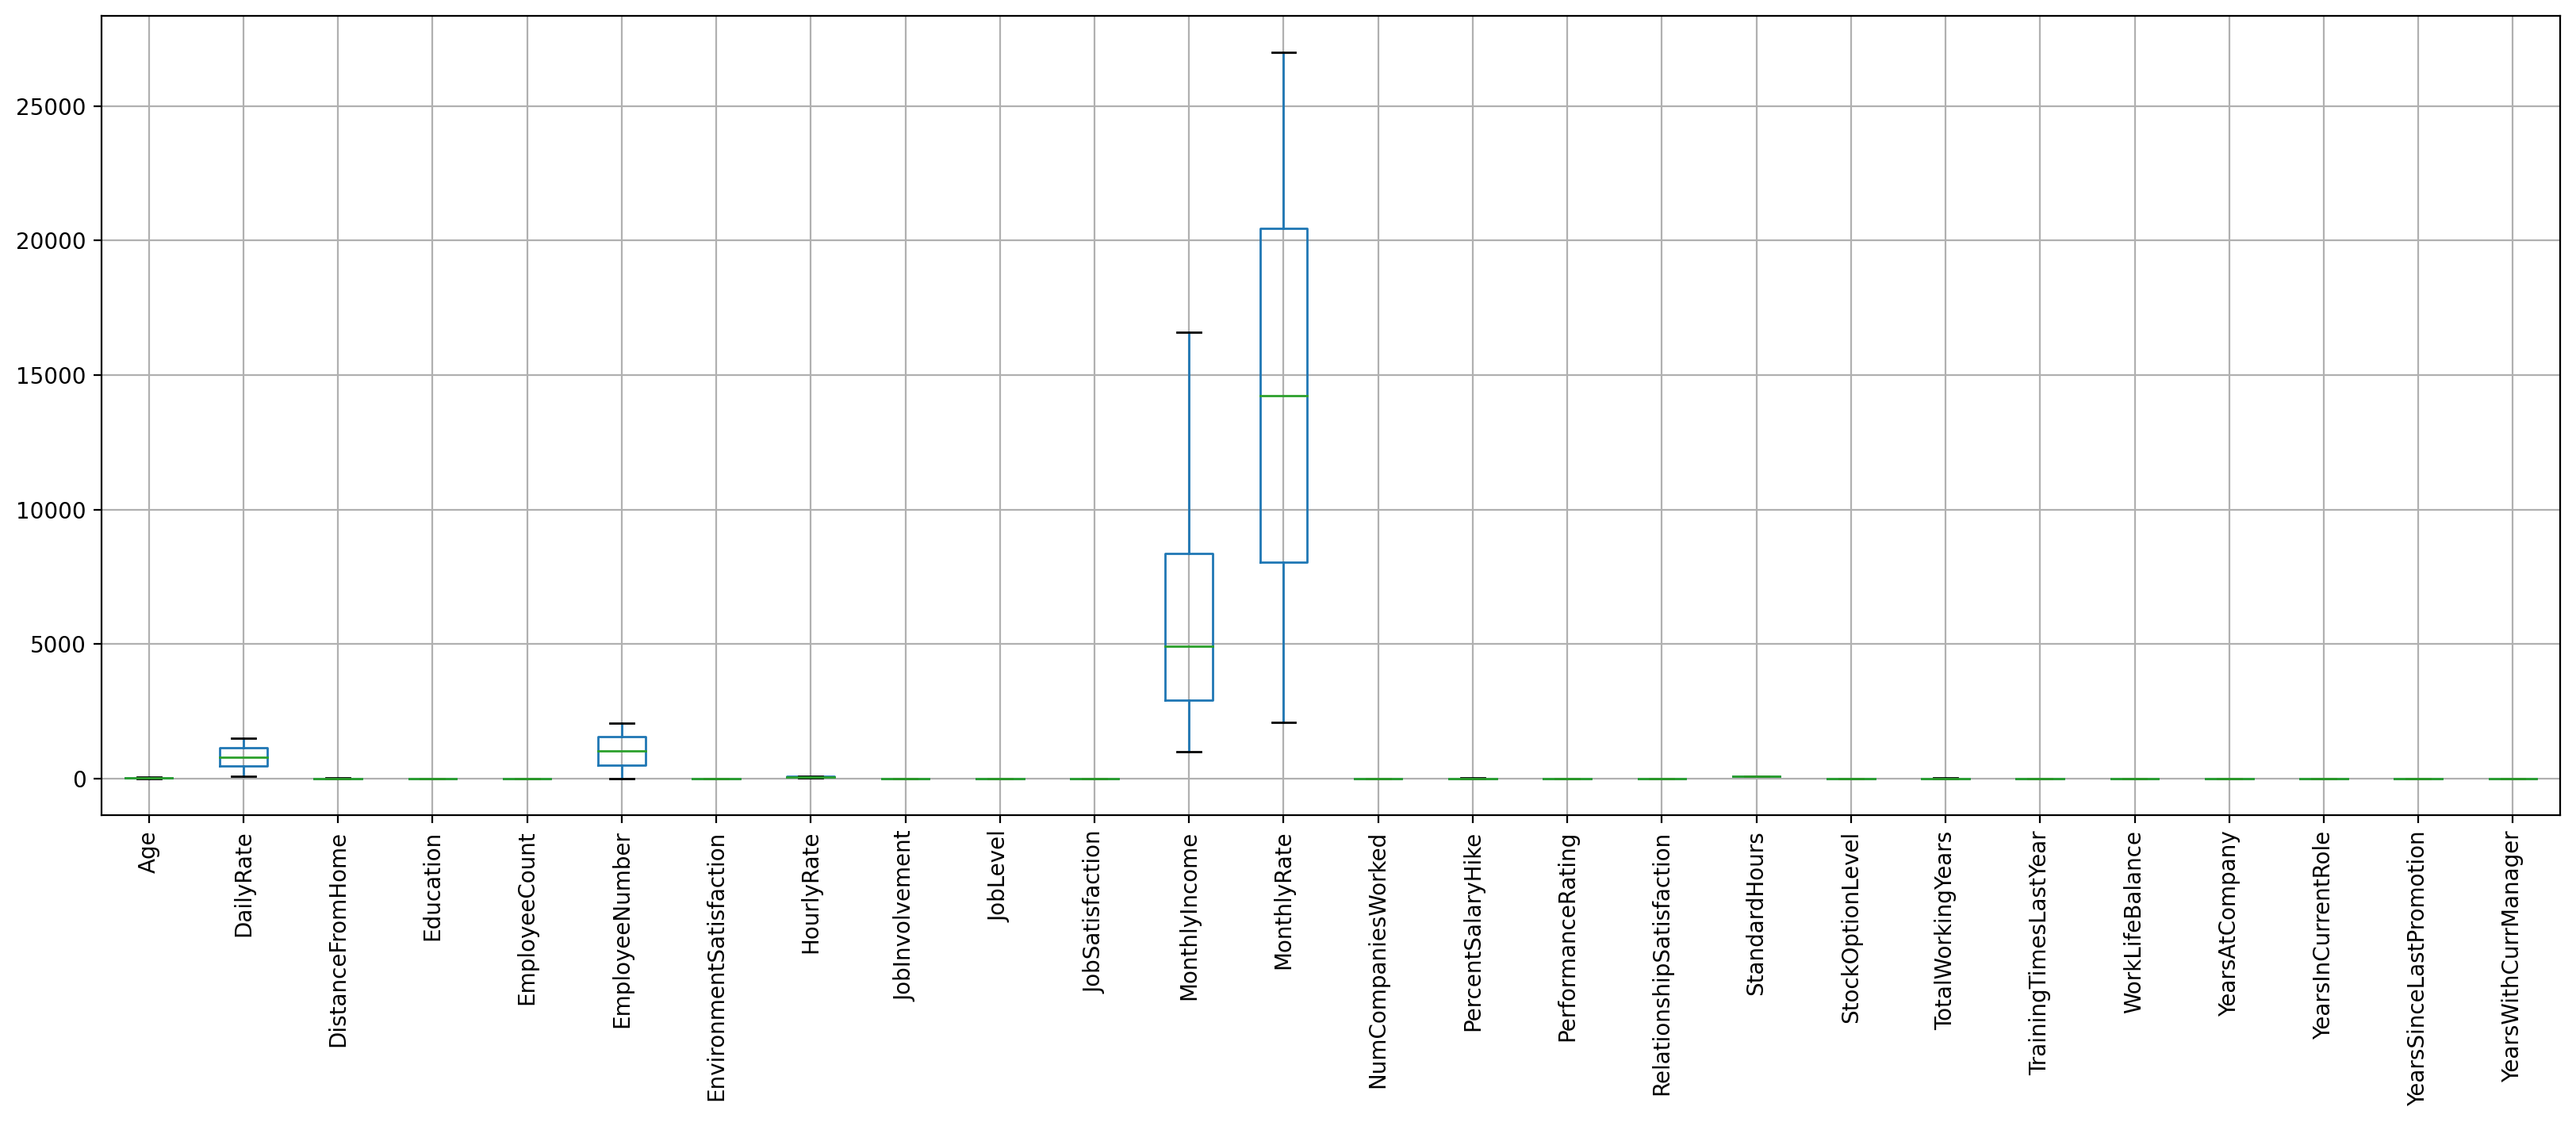

In [6]:
# removing outliers 
for i in df.columns:
    if df[i].dtype == 'int64':
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        low = q1 - 1.5*iqr
        high = q3 + 1.5*iqr
        df[i] = df[i].clip(lower=low, upper=high)

# Checking for outliers again
df.boxplot(figsize=(20,8))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)

In [7]:
df.shape

(1470, 35)

In [8]:
#Check the number of employee that have left
left = df[df.Attrition=='Yes']

#Check the number of employee that are still working 
retained = df[df.Attrition=='No']

print(f'Eployee who have left: {left.shape[0]}')
print(f'Employee who Remain: {retained.shape[0]}')

Eployee who have left: 237
Employee who Remain: 1233


In [9]:
#Calculate the Attirtion rate (df['Attrition']=='Yes')
Attrition_Rate = (df['Attrition']=='Yes').sum() / len(df.Attrition) * 100 
print(f'Attrition Rate: {Attrition_Rate.round(2)} %')

Attrition Rate: 16.12 %


In [10]:
#check the uniquen value count of each column
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1238
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              1
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             30
TrainingTimesLastYear          6
WorkLifeBa

**Attrition Rate(pie chart)**

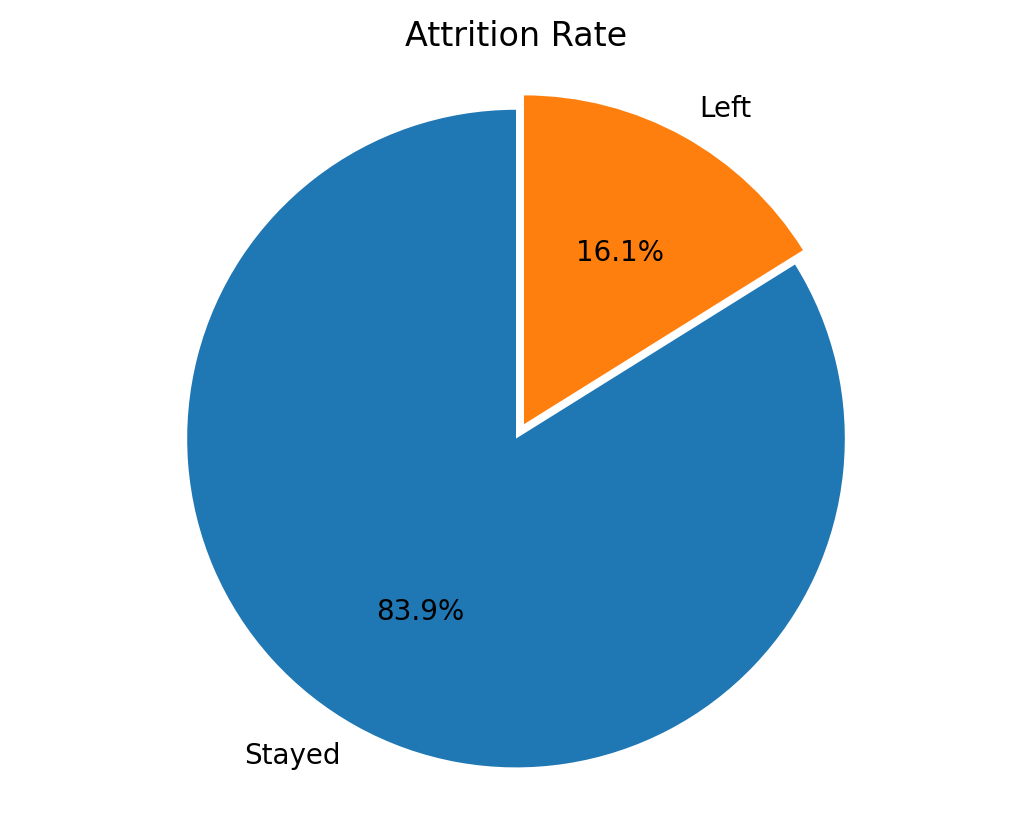

In [11]:
attrition_counts = df['Attrition'].value_counts()

explode = (0.05, 0)
plt.pie(attrition_counts, explode=explode, labels=['Stayed','Left'],
        autopct='%1.1f%%', startangle=90, textprops={'color': "black"})

plt.title('Attrition Rate')

plt.axis('equal')

plt.show()

**Mean attrition value for each feature**



In [14]:
df.groupby('Attrition').mean()

<ipython-input-14-88c1264005d6>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Attrition').mean()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.816707,11.681265,2.734388,2.781022,6.972425,4.459448,1.963504,4.348743
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.495781,8.094937,2.588608,2.658228,4.772152,2.898734,1.710970,2.852321


**Attrition by Age**

Text(0.5, 1.0, 'Cross-tabulation of Age and Attrition')

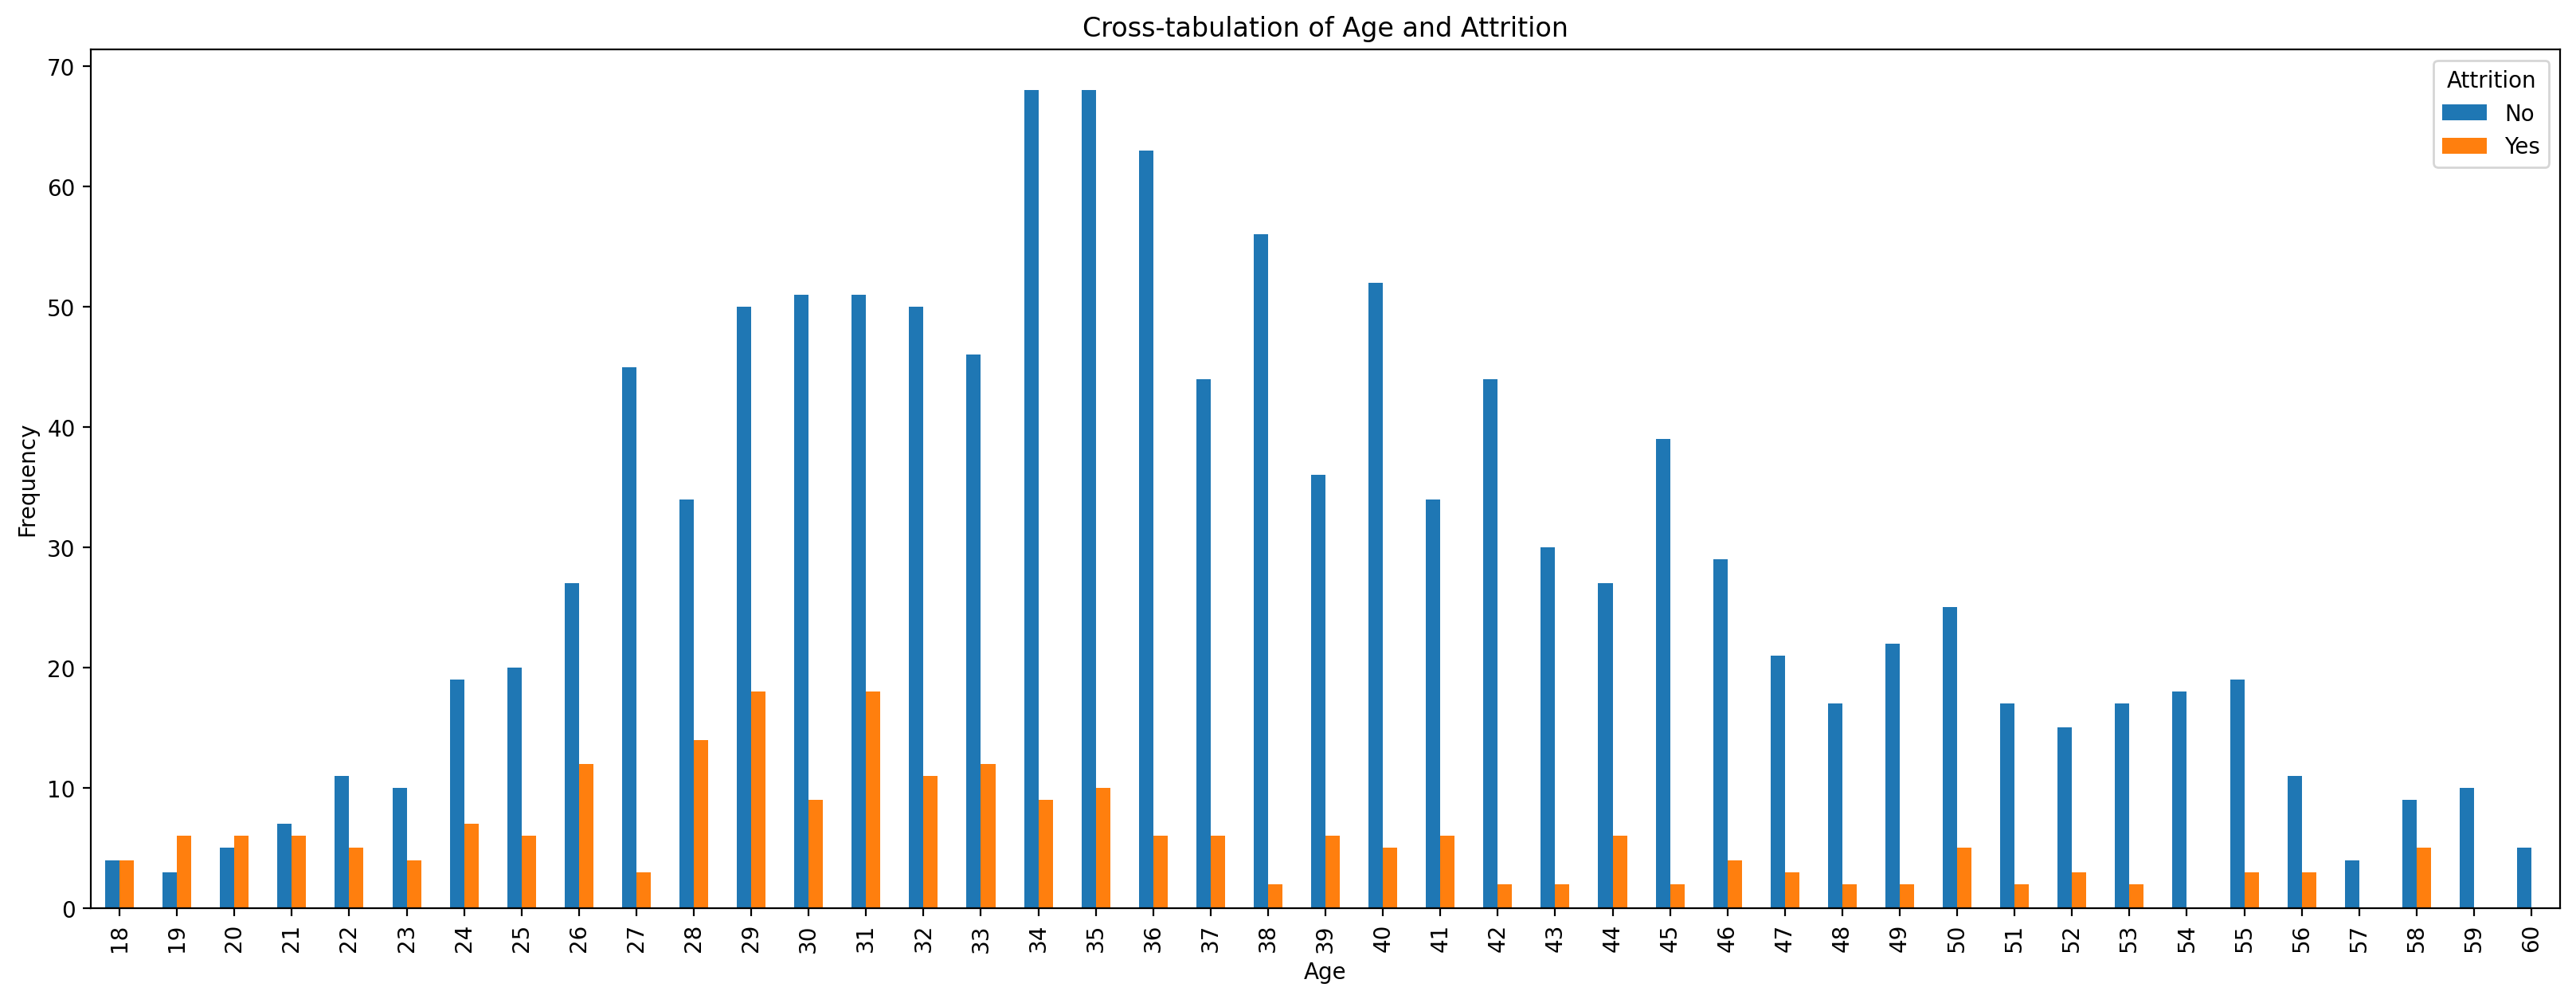

In [23]:
#Plotting age against attirion column - cross tab
pd.crosstab(df.Age,df.Attrition).plot(kind='bar',figsize=(20,7))
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Cross-tabulation of Age and Attrition')

Axes(0.125,0.11;0.775x0.77)


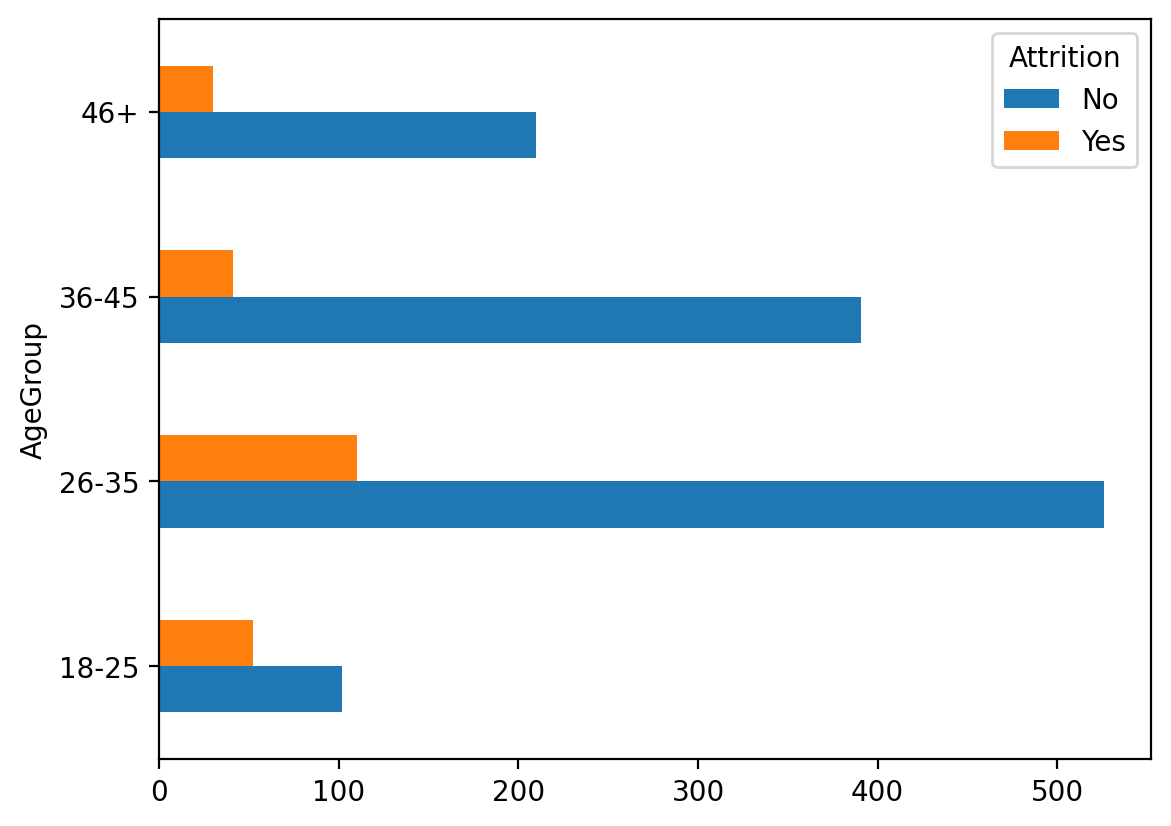

In [24]:
# Group the age column into four age ranges
df_age =df.copy()
age_bins = [18, 26, 36, 46, 100]
age_labels = ['18-25', '26-35', '36-45', '46+']
df_age['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Create a crosstabulation table of Attrition and AgeGroup
attrition_by_age = pd.crosstab(df_age['AgeGroup'], df['Attrition']).plot(kind='barh')

# Print the results
print(attrition_by_age)

**Percentage of Attrition By AgeGroup**



In [27]:
# Create a crosstabulation table of Attrition and AgeGroup
attrition_by_age = pd.crosstab(df_age['AgeGroup'], df['Attrition'], colnames=['Count'], normalize='index')
attrition_by_age = attrition_by_age['Yes'].mul(100).round(2)
print("Percentage of Attrition by Age Group")
print(attrition_by_age)

Percentage of Attrition by Age Group
AgeGroup
18-25    33.77
26-35    17.30
36-45     9.49
46+      12.50
Name: Yes, dtype: float64


**MonthlyIncome and Attrition**

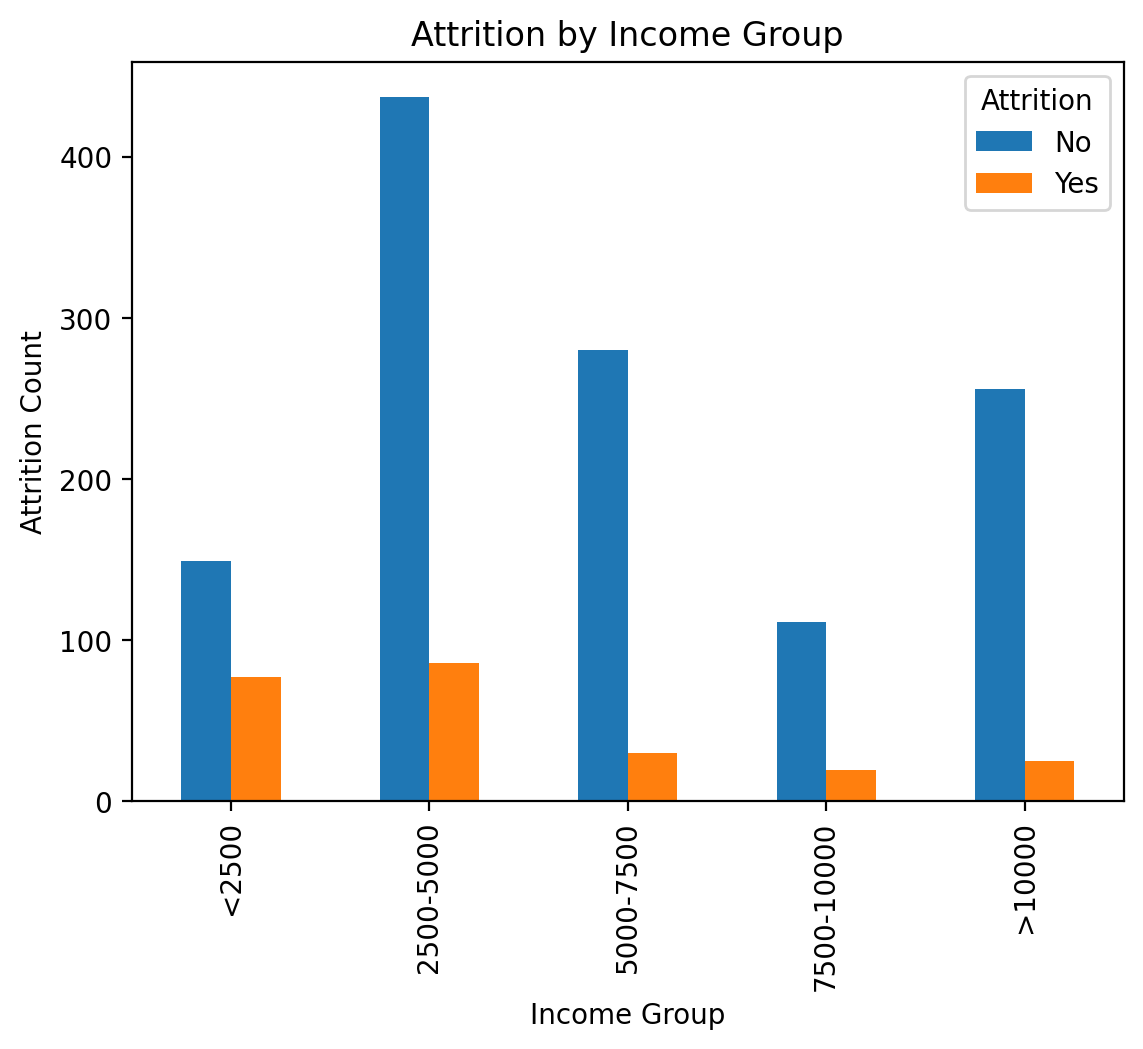

In [16]:
bins = [0, 2500, 5000, 7500, 10000, df['MonthlyIncome'].max()]
labels = ['<2500', '2500-5000', '5000-7500', '7500-10000', '>10000']
df_monthlyIncome = df.copy()
df_monthlyIncome['IncomeGroup'] = pd.cut(df['MonthlyIncome'], bins=bins, labels=labels)

# Calculate attrition rate for each income group
ct = pd.crosstab(df_monthlyIncome['IncomeGroup'], df['Attrition'])

# Plot the crosstab
ax = ct.plot(kind='bar')

# Set the plot title and axis labels
ax.set_title('Attrition by Income Group')
ax.set_ylabel('Attrition Count')
ax.set_xlabel('Income Group')

plt.show()


**Distance from home by Attrition Level**

Attrition Rate by Distance From Home


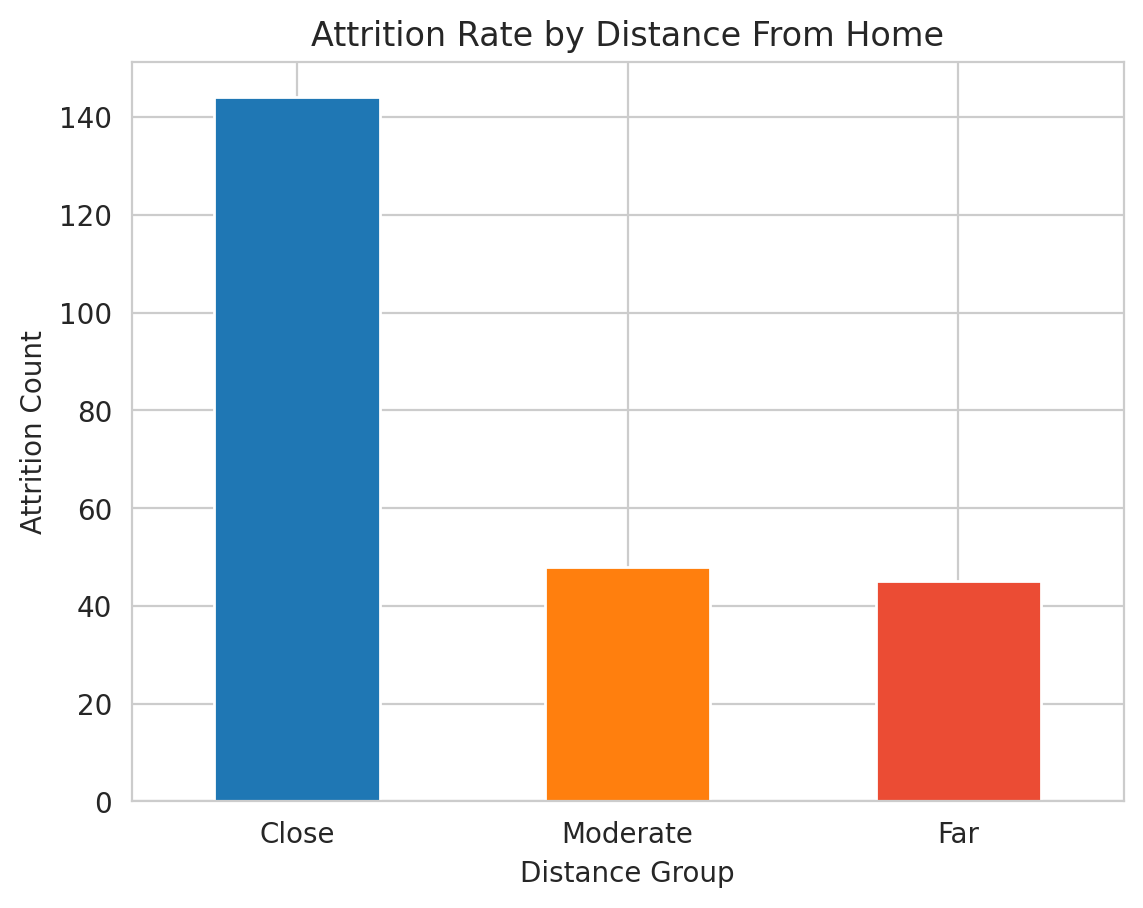

In [24]:
df_distance = df.copy()
distance_bins = [0, 10, 20, np.inf]
distance_labels = ['Close', 'Moderate', 'Far']
df_distance['DistanceGroup'] = pd.cut(df_distance['DistanceFromHome'], bins=distance_bins, labels=distance_labels)

# Create a crosstabulation table of Attrition and DistanceGroup
attrition_by_distance = pd.crosstab(df_distance['DistanceGroup'], df_distance['Attrition'])
attrition_by_distance = attrition_by_distance['Yes']
print("Attrition Rate by Distance From Home")
attrition_by_distance.plot(kind='bar',color=['#1f77b4', '#ff7f0e','#eb4c34'])
plt.title('Attrition Rate by Distance From Home')
plt.xlabel('Distance Group')
plt.ylabel('Attrition Count')
plt.xticks(rotation=0)
plt.show()

**Group the DistanceFromHome column into three distance ranges**

In [25]:
attrition_by_distance

DistanceGroup
Close       144
Moderate     48
Far          45
Name: Yes, dtype: int64

**Years in company (tenure-grouped) and attrition rate**

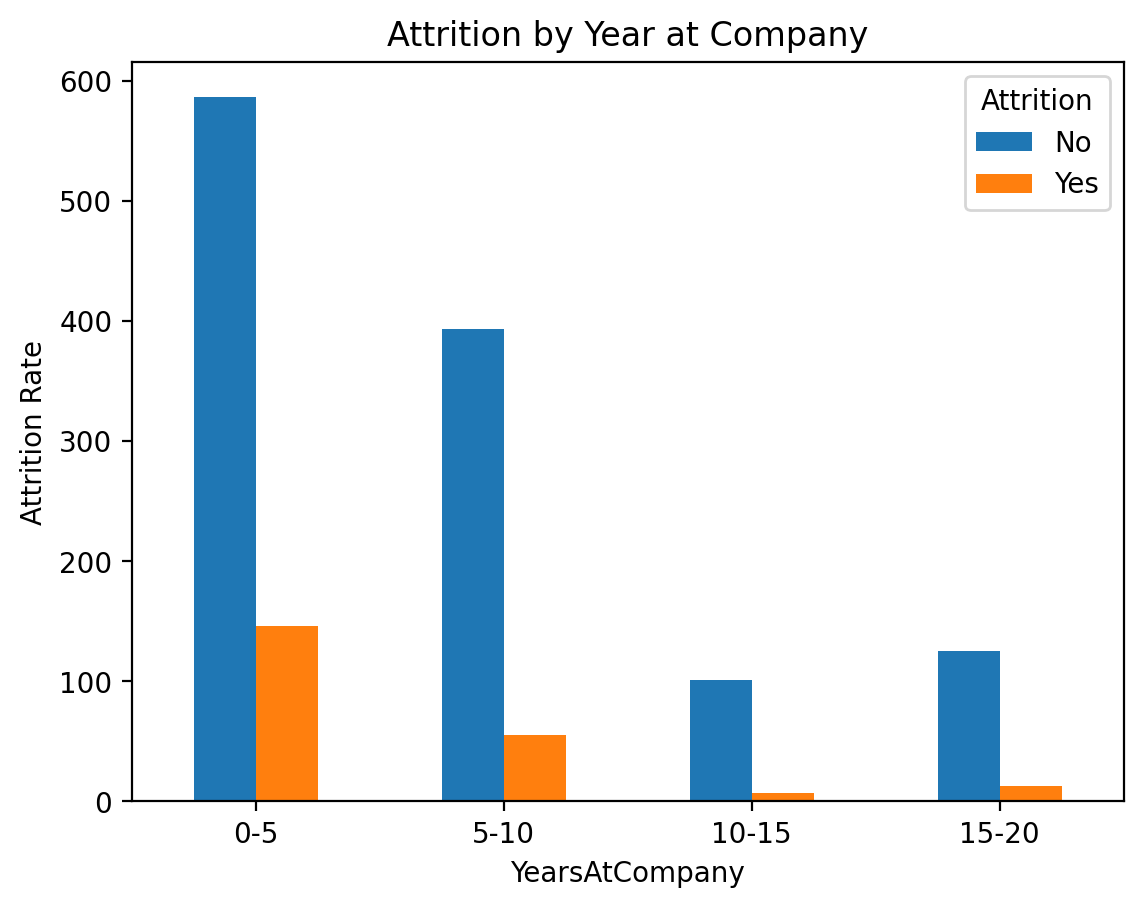

In [19]:
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ["0-5", "5-10", "10-15", "15-20", "20+"]
df_yearsAtCompany = df.copy()
df_yearsAtCompany['YearsAtCompanyGroup'] = pd.cut(df['YearsAtCompany'], bins=bins, labels=labels)

ct = pd.crosstab(df_yearsAtCompany['YearsAtCompanyGroup'], df_yearsAtCompany['Attrition'])

# Plot the crosstab
ax = ct.plot(kind='bar')

# Set the plot title and axis labels
ax.set_title('Attrition by Year at Company')
ax.set_ylabel('Attrition Rate')
ax.set_xlabel('YearsAtCompany')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.show()

**Education and Attrition**

Text(0.5, 1.0, 'Cross-tabulation of Education and Attrition')

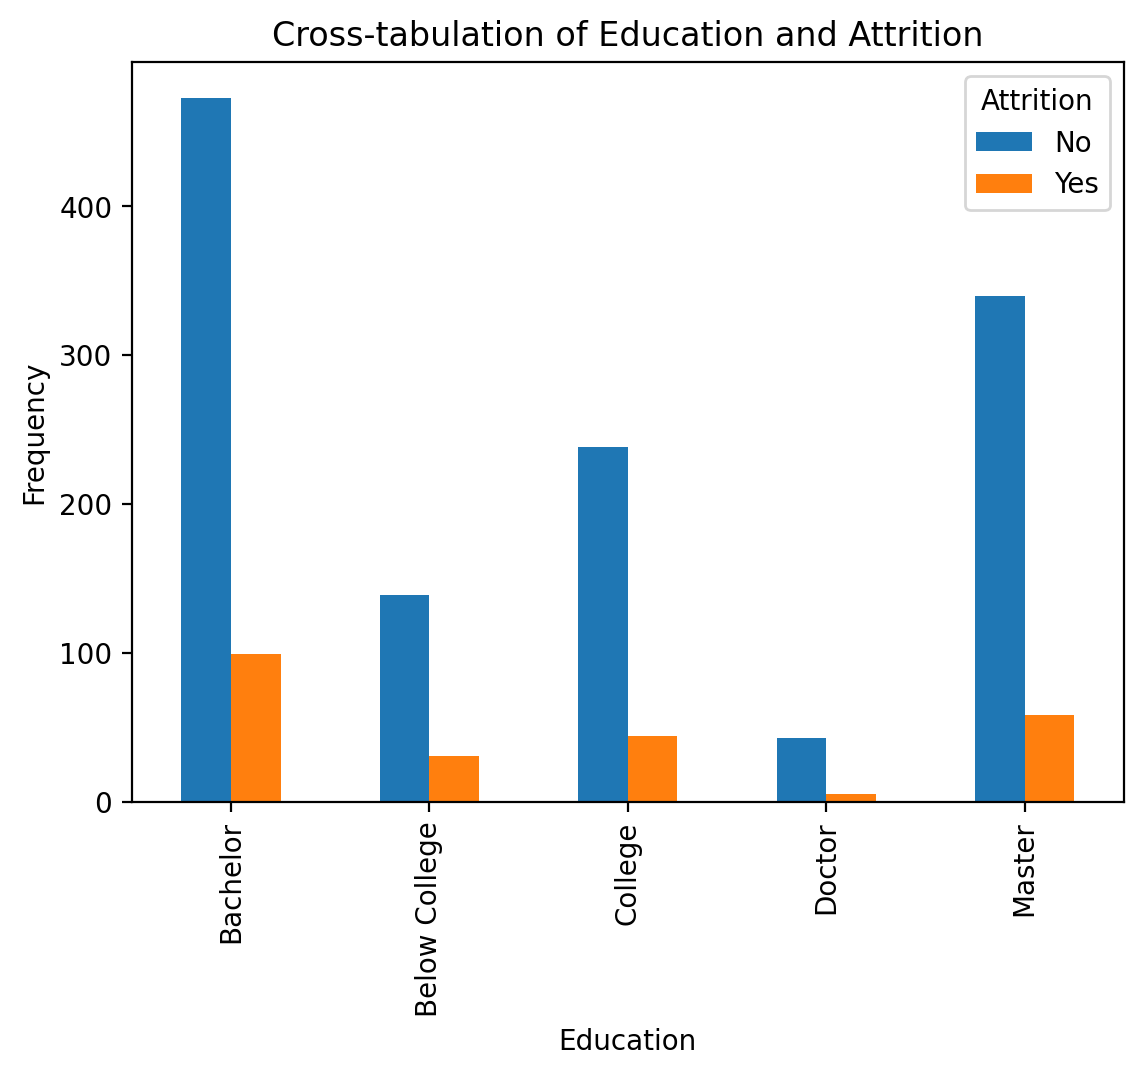

In [20]:
education_labels = {1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}
education_copy = df.copy()
education_copy['EducationLabel'] = df['Education'].map(education_labels)
pd.crosstab(education_copy.EducationLabel,df.Attrition).plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Cross-tabulation of Education and Attrition')

**Monthly Income, Age Group and Attrition Rate (Scatter Plot)**

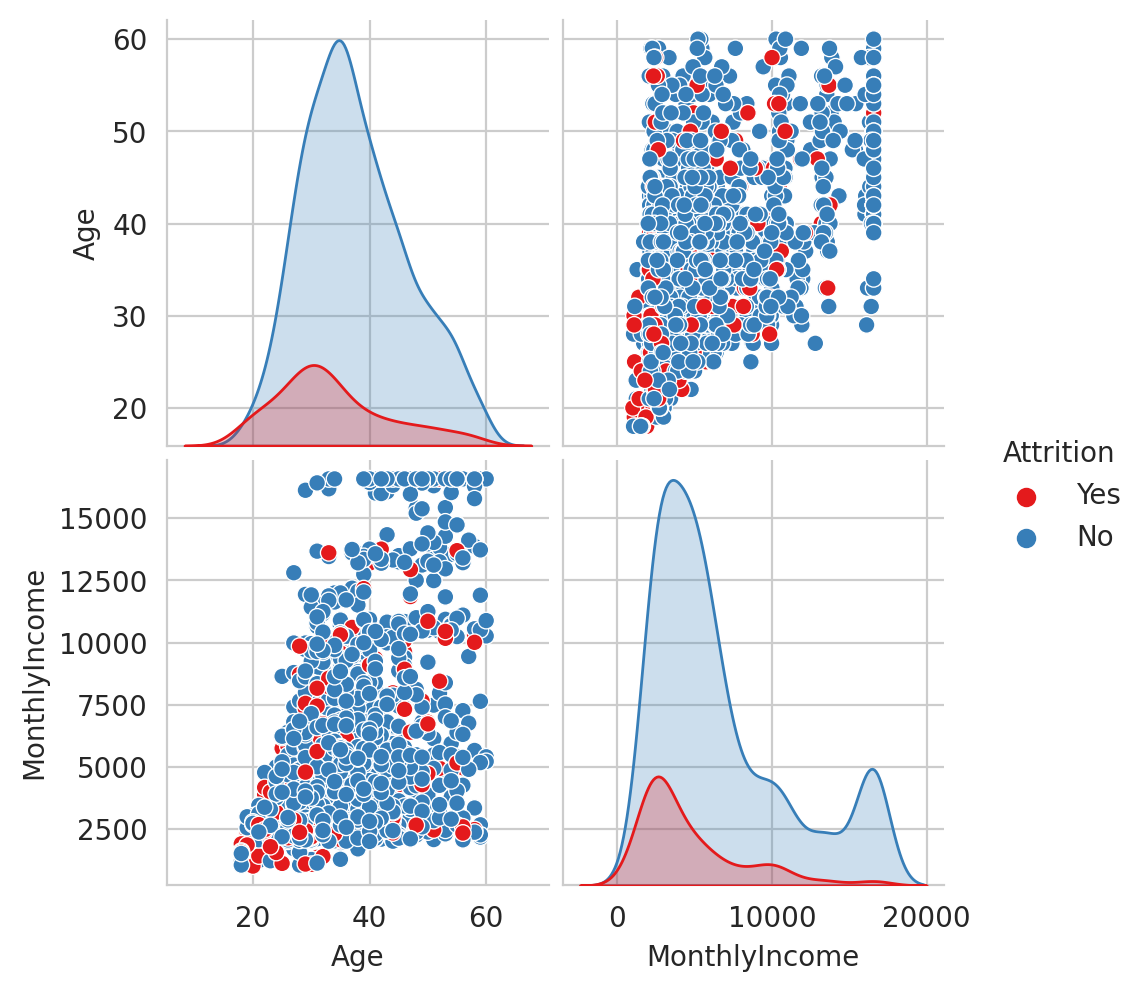

In [23]:
sn.pairplot(df[['Age', 'MonthlyIncome', 'Attrition']], hue='Attrition')

**Attrition by Job level**

In [26]:
# Group by Attrition and JobLevel, and count the number of occurrences
joblevel_attrition_counts = df.groupby(['JobLevel', 'Attrition']).count()['MonthlyIncome'].reset_index()

# Pivot the table to get 'No' and 'Yes' counts for each JobLevel
joblevel_attrition_pivot = joblevel_attrition_counts.pivot_table(index='JobLevel', columns='Attrition', values='MonthlyIncome').reset_index()
joblevel_attrition_pivot.columns.name = None

# Calculate the percentage of attrition for each JobLevel
joblevel_attrition_pivot['Yes%'] = (joblevel_attrition_pivot['Yes'] / (joblevel_attrition_pivot['No'] + joblevel_attrition_pivot['Yes'])) * 100

# Display the resulting DataFrame
joblevel_attrition_pivot.round(2)

,JobLevel,No,Yes,Yes%
0,1,400,143,26.34
1,2,482,52,9.74
2,3,186,32,14.68
3,4,101,5,4.72
4,5,64,5,7.25


**Mean Age by JobLevel**

In [27]:
age_by_jobLevel = df[['JobLevel','Age']]
age_by_jobLevel.groupby('JobLevel').mean()

,Age
JobLevel,
1,32.524862
2,36.599251
3,40.087156
4,47.537736
5,47.753623


**Department and Attrition rate**

In [28]:
department_attrition = df[df['Attrition']=='Yes'].groupby('Department').count()['EmployeeNumber']
department_total = df.groupby('Department').count()['EmployeeNumber']

total_attrition = df[df['Attrition']=='Yes'].count()['Age']
print("Department Attrition")
department_name = df.Department.unique()
print(department_attrition)
print("Total Department")
print(department_total)

Department Attrition
Department
Human Resources            12
Research & Development    133
Sales                      92
Name: EmployeeNumber, dtype: int64
Total Department
Department
Human Resources            63
Research & Development    961
Sales                     446
Name: EmployeeNumber, dtype: int64


In [29]:
count = 0
department_attrition_percentage =[] 
for dept in department_attrition:
  
  percentage =((dept/department_total[count])*100).round(2)
  department_attrition_percentage.append({department_name[count], percentage})
  count +=1

print(department_attrition_percentage)



[{19.05, 'Sales'}, {'Research & Development', 13.84}, {'Human Resources', 20.63}]


Text(0.5, 1.0, 'Cross-tabulation of Department and Attrition')

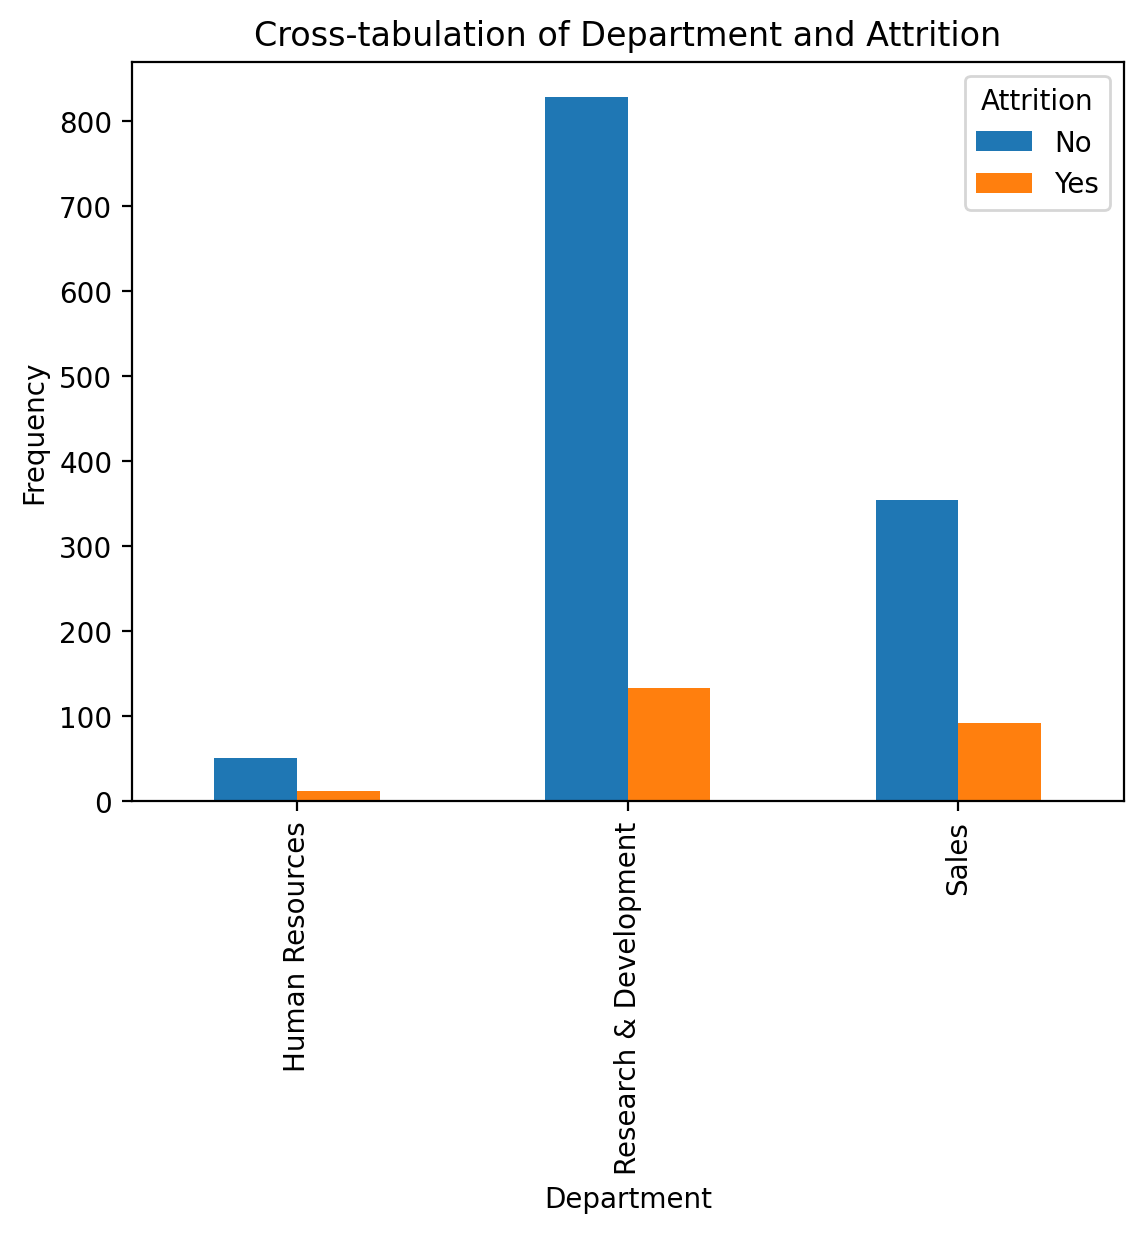

In [20]:
#Plotting the Department with Attrition columnn 
pd.crosstab(df.Department,df.Attrition).plot(kind='bar')
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.title('Cross-tabulation of Department and Attrition')

**Marital status and Attrition**

Text(0.5, 1.0, 'Cross-tabulation of MaritalStatus and Attrition')

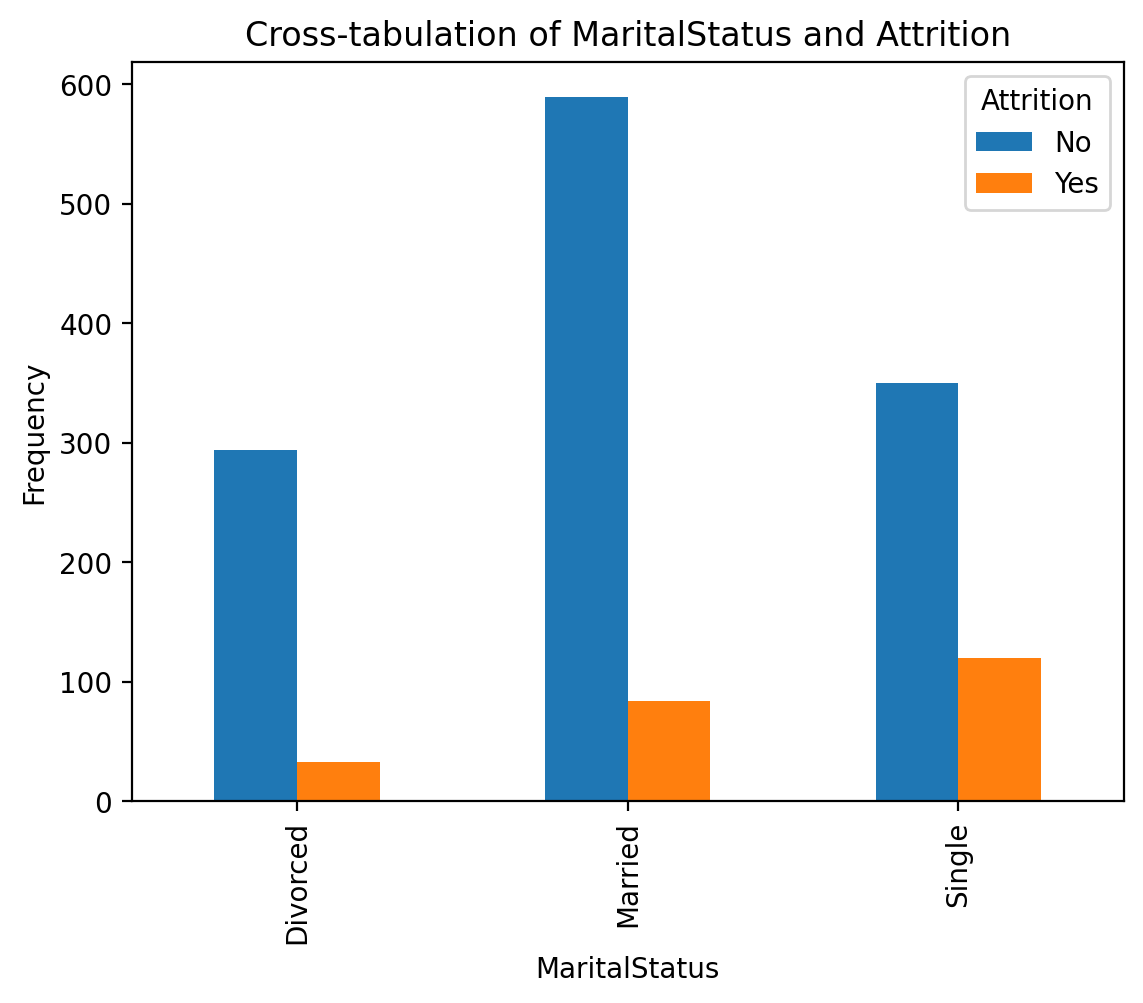

In [18]:
pd.crosstab(df.MaritalStatus,df.Attrition).plot(kind='bar')
plt.xlabel('MaritalStatus')
plt.ylabel('Frequency')
plt.title('Cross-tabulation of MaritalStatus and Attrition')

**Business Travel and Attrition Rate**

Text(0.5, 1.0, 'Cross-tabulation of Business Travel and Attrition')

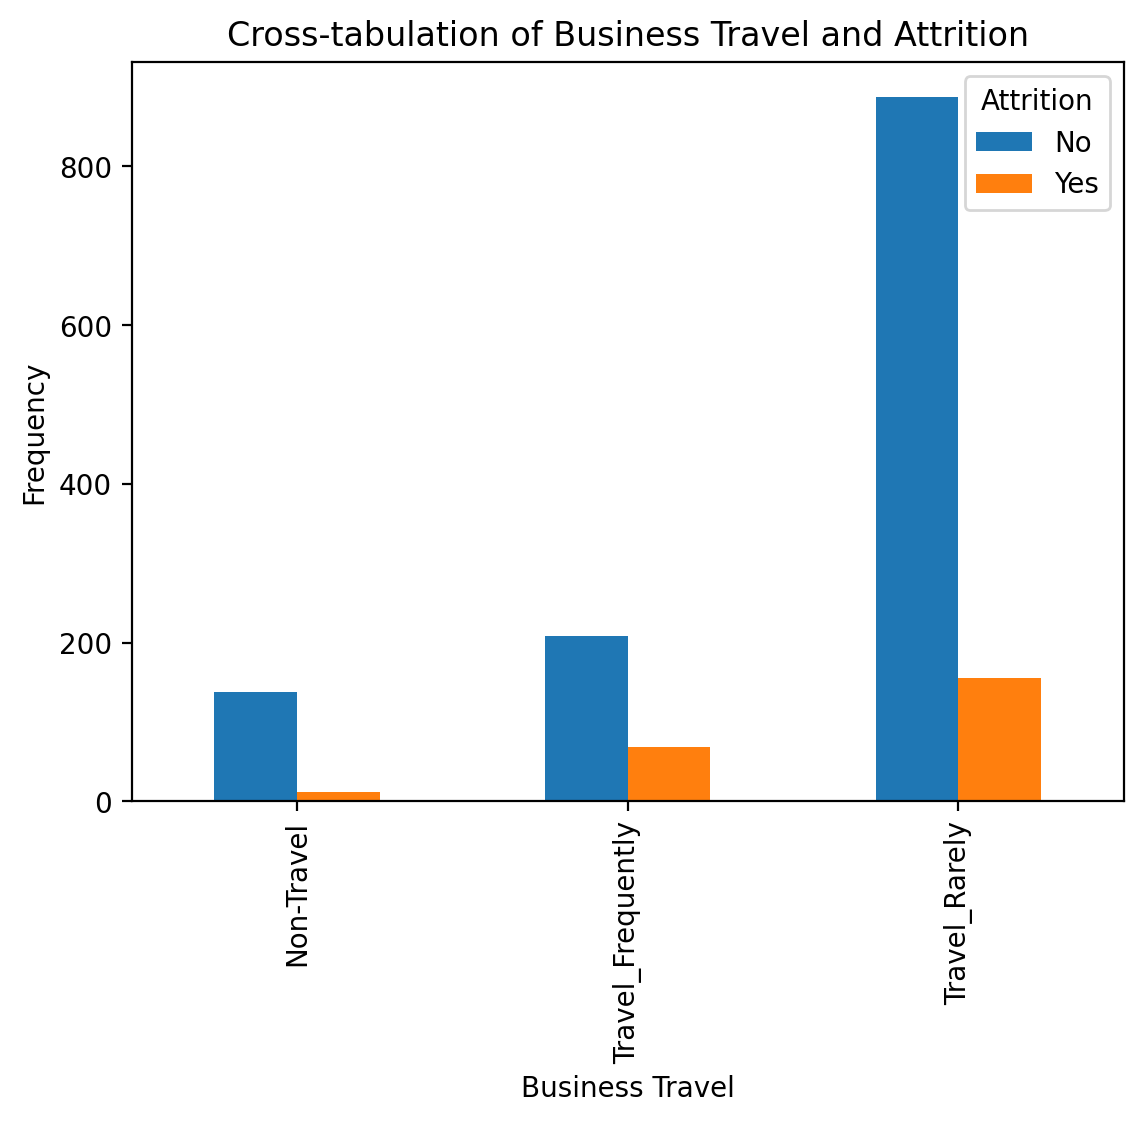

In [19]:
#Plotting the Business Travel with Attrition columnn 
pd.crosstab(df.BusinessTravel,df.Attrition).plot(kind='bar')
plt.xlabel('Business Travel')
plt.ylabel('Frequency')
plt.title('Cross-tabulation of Business Travel and Attrition')

**Gender and Attrition Rate**

<Axes: xlabel='Gender'>

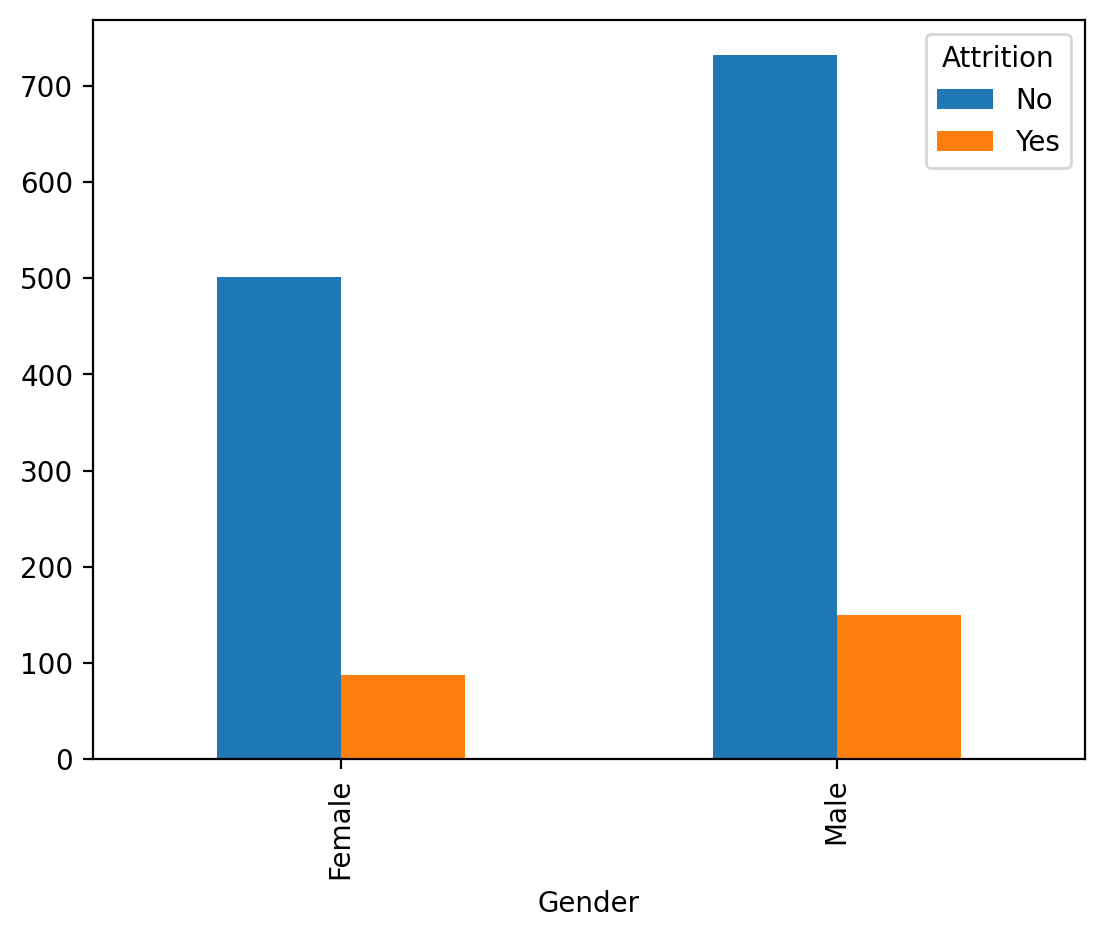

In [21]:
pd.crosstab(df.Gender,df.Attrition).plot(kind='bar')

**Marital Status, Gender and Attrition Rate**

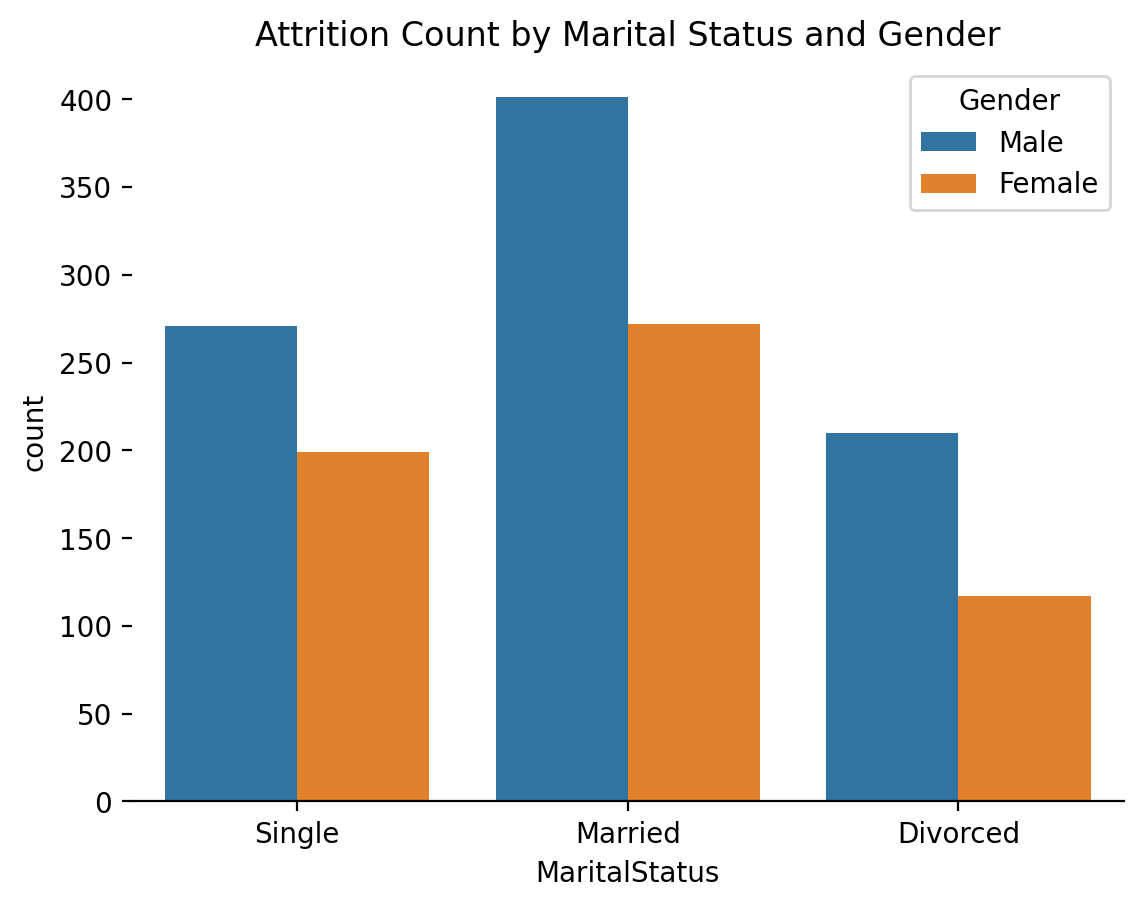

In [22]:
sn.countplot(data=df, x='MaritalStatus', hue='Gender', hue_order=['Male', 'Female'], order=['Single', 'Married', 'Divorced'])
sn.despine(left=True)

# Set the title
plt.title('Attrition Count by Marital Status and Gender')

plt.show()

In [29]:
#Remove meaningless features
df.drop(['EmployeeCount', 'EmployeeNumber', 'PerformanceRating', 'StandardHours', 'Over18'], axis=1, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,1,0.0,8.0,0.5,1,6,4.0,0.0,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,1.0,10.0,3.0,3,10,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,2,0.0,7.0,3.0,3,0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,0.0,8.0,3.0,3,8,7.0,3.0,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,4,1.0,6.0,3.0,3,2,2.0,2.0,2.0


In [30]:
#Check the shape of the dataset to confirm 
df.shape[1]

30

In [31]:
#Covert the categorical features into binary format
df_with_dummies = df.copy()
df_with_dummies = pd.get_dummies(data=df, columns=['BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'EducationField'])
df_with_dummies.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,Yes,1102,1,2,2,94,3,2,4,...,0,1,0,1,0,1,0,0,0,0
1,49,No,279,8,1,3,61,2,2,2,...,1,0,1,0,0,1,0,0,0,0
2,37,Yes,1373,2,2,4,92,2,1,3,...,0,1,0,1,0,0,0,0,1,0
3,33,No,1392,3,4,4,56,3,1,3,...,1,0,0,1,0,1,0,0,0,0
4,27,No,591,2,1,1,40,3,1,2,...,1,0,1,0,0,0,0,1,0,0


In [32]:
#Check the updated number of variables
df_with_dummies.shape[1]

51

In [33]:
#Convert the target variable to binary format
df_new = df_with_dummies.copy()
df_new['Attrition'] = df_new['Attrition'].map({'Yes': 1, 'No': 0})
df_new.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1,1102,1,2,2,94,3,2,4,...,0,1,0,1,0,1,0,0,0,0
1,49,0,279,8,1,3,61,2,2,2,...,1,0,1,0,0,1,0,0,0,0
2,37,1,1373,2,2,4,92,2,1,3,...,0,1,0,1,0,0,0,0,1,0
3,33,0,1392,3,4,4,56,3,1,3,...,1,0,0,1,0,1,0,0,0,0
4,27,0,591,2,1,1,40,3,1,2,...,1,0,1,0,0,0,0,1,0,0


In [35]:
#Identify and assign the features and target to a variable
X = df_new.drop(['Attrition'], axis=1)
y = df_new['Attrition']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [37]:
print(X.shape)
print(y.shape)

(1470, 50)
(1470,)


**Implement Robust Scaling**

In [38]:
from sklearn.preprocessing import RobustScaler
# Scale the features
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
#define the hyperparameters
model_params = {
    'svm': {
        'model': svm.SVC(),
        'params' : {
            'C': [0.1,1,10],
            'gamma':[0.1,1,10],
            'kernel': ['rbf','linear','sigmoid','poly']
        }  
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion': ['gini', 'entropy'],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 5, 10],
            'max_features': [None, 'auto', 'sqrt', 'log2']
        }         
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,50,100],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [0.1,1,5]        
        }
    }
}


In [40]:
#Search the hyperparameter grid using GridSearchCV()
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train_scaled, y_train)
    
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'best_estimator': clf.best_estimator_,
        'model_object': clf
    })
    
df_score = pd.DataFrame(scores,columns=['model','best_score','best_params'])
#df_score.sort_values('best_score', ascending=True)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

**Models According to Performance**

In [41]:
df_score.sort_values('best_score', ascending=False)

,model,best_score,best_params
0,svm,0.877547,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}"
3,logistic_regression,0.874620,{'C': 1}
2,random_forest,0.859091,"{'max_features': 'sqrt', 'n_estimators': 50}"
1,decision_tree,0.846436,"{'criterion': 'gini', 'max_features': 'log2', ..."


**Graph showing model perfomances**

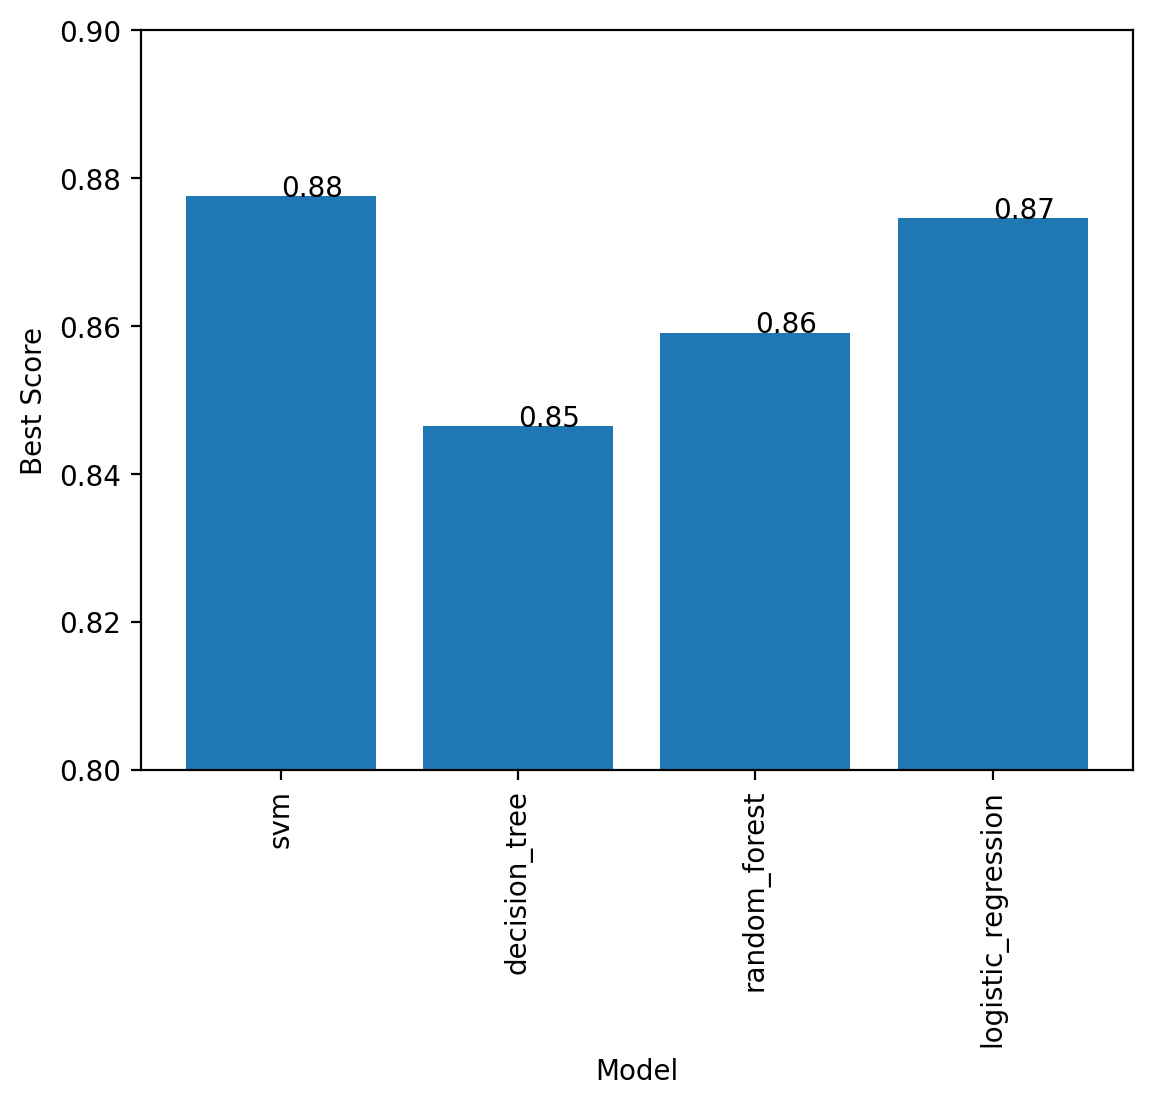

In [42]:
# create a vertical bar chart
plt.bar(df_score['model'], df_score['best_score'])

# set chart title and axis labels
plt.xlabel('Model')
plt.xticks(rotation=90)
plt.ylabel('Best Score')
plt.ylim(0.8, 0.9)

# add labels to the bars
for i, score in enumerate(df_score['best_score']):
    plt.text(i, score, str(round(score, 2)))

# display the chart
plt.show()

**Pick the best model**



In [48]:
svmModel = scores.pop(0)

**Best Classifier**

In [49]:
best_classifier= svmModel['model_object'].best_estimator_
print(best_classifier,'\n')

SVC(C=0.1, gamma=0.1, kernel='linear') 



**Print the confusion matrix**

In [50]:
y_pred = best_classifier.predict(X_test_scaled)
print(confusion_matrix(y_test, y_pred))

[[376   4]
 [ 45  16]]


**Display the confusion matrix (heatmap)**

<Axes: >

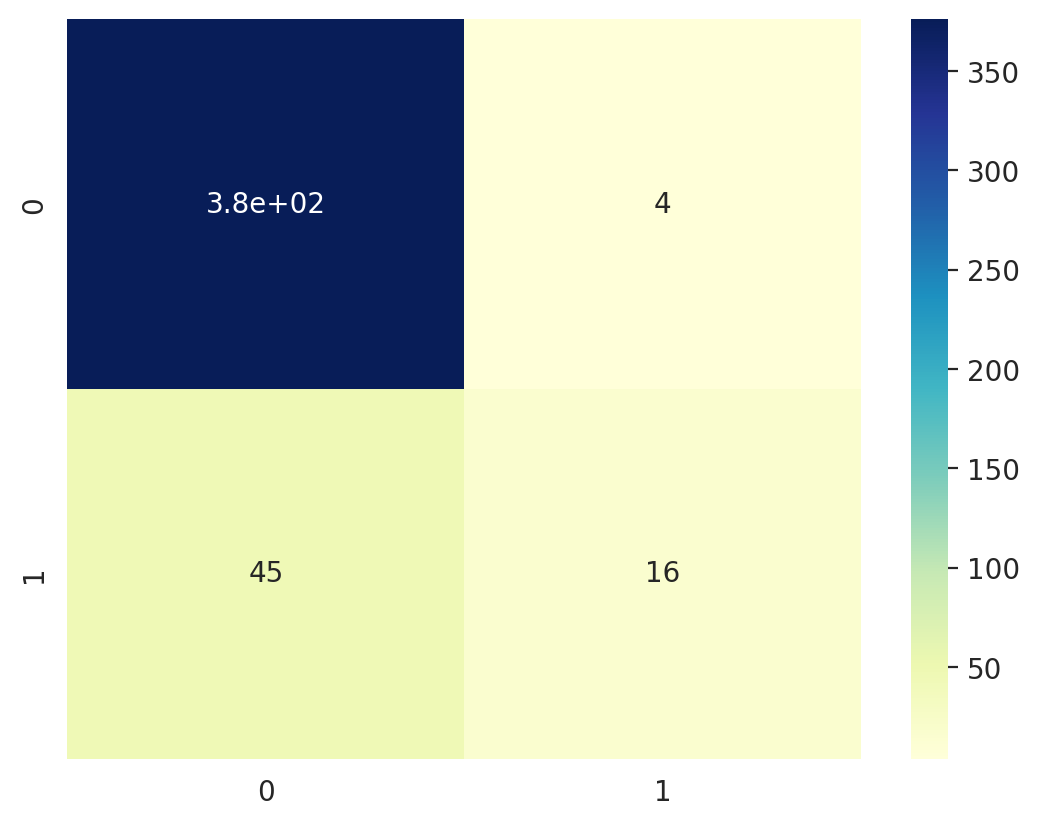

In [51]:
sn.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="YlGnBu")


**Classification Report**

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       380
           1       0.80      0.26      0.40        61

    accuracy                           0.89       441
   macro avg       0.85      0.63      0.67       441
weighted avg       0.88      0.89      0.86       441



**Display the feature impact**

In [53]:
feature_impact = list(zip(X_train.columns, best_classifier.coef_[0]))
feature_impact

[('Age', -0.23693737692513459),
 ('DailyRate', -0.008189110095108906),
 ('DistanceFromHome', 0.22570997144243432),
 ('Education', 0.003669721581972138),
 ('EnvironmentSatisfaction', -0.45324385640855386),
 ('HourlyRate', -0.027417092892408068),
 ('JobInvolvement', -0.3000134532701719),
 ('JobLevel', -0.010196480548244347),
 ('JobSatisfaction', -0.44885659934739486),
 ('MonthlyIncome', -0.04560708124083926),
 ('MonthlyRate', 0.023891231836887544),
 ('NumCompaniesWorked', 0.3733557681545831),
 ('PercentSalaryHike', 0.05371799470317144),
 ('RelationshipSatisfaction', -0.2706617126948107),
 ('StockOptionLevel', -0.08001835930975579),
 ('TotalWorkingYears', -0.4154653680665784),
 ('TrainingTimesLastYear', -0.07453993722354285),
 ('WorkLifeBalance', -0.13893496852771747),
 ('YearsAtCompany', 0.036844871860050296),
 ('YearsInCurrentRole', -0.3642465146007524),
 ('YearsSinceLastPromotion', 0.22281467944763073),
 ('YearsWithCurrManager', -0.09397073575387851),
 ('BusinessTravel_Non-Travel', -0.

**Feature Impact Chart**

OverTime_No                         -0.533170
EnvironmentSatisfaction             -0.453244
JobSatisfaction                     -0.448857
TotalWorkingYears                   -0.415465
BusinessTravel_Non-Travel           -0.381933
YearsInCurrentRole                  -0.364247
JobInvolvement                      -0.300013
RelationshipSatisfaction            -0.270662
MaritalStatus_Divorced              -0.260106
JobRole_Healthcare Representative   -0.237139
Age                                 -0.236937
JobRole_Sales Executive             -0.227487
JobRole_Research Director           -0.208963
EducationField_Medical              -0.190128
EducationField_Other                -0.182855
Department_Research & Development   -0.176791
MaritalStatus_Married               -0.158013
WorkLifeBalance                     -0.138935
JobRole_Manufacturing Director      -0.119838
JobRole_Research Scientist          -0.104406
YearsWithCurrManager                -0.093971
EducationField_Life Sciences      

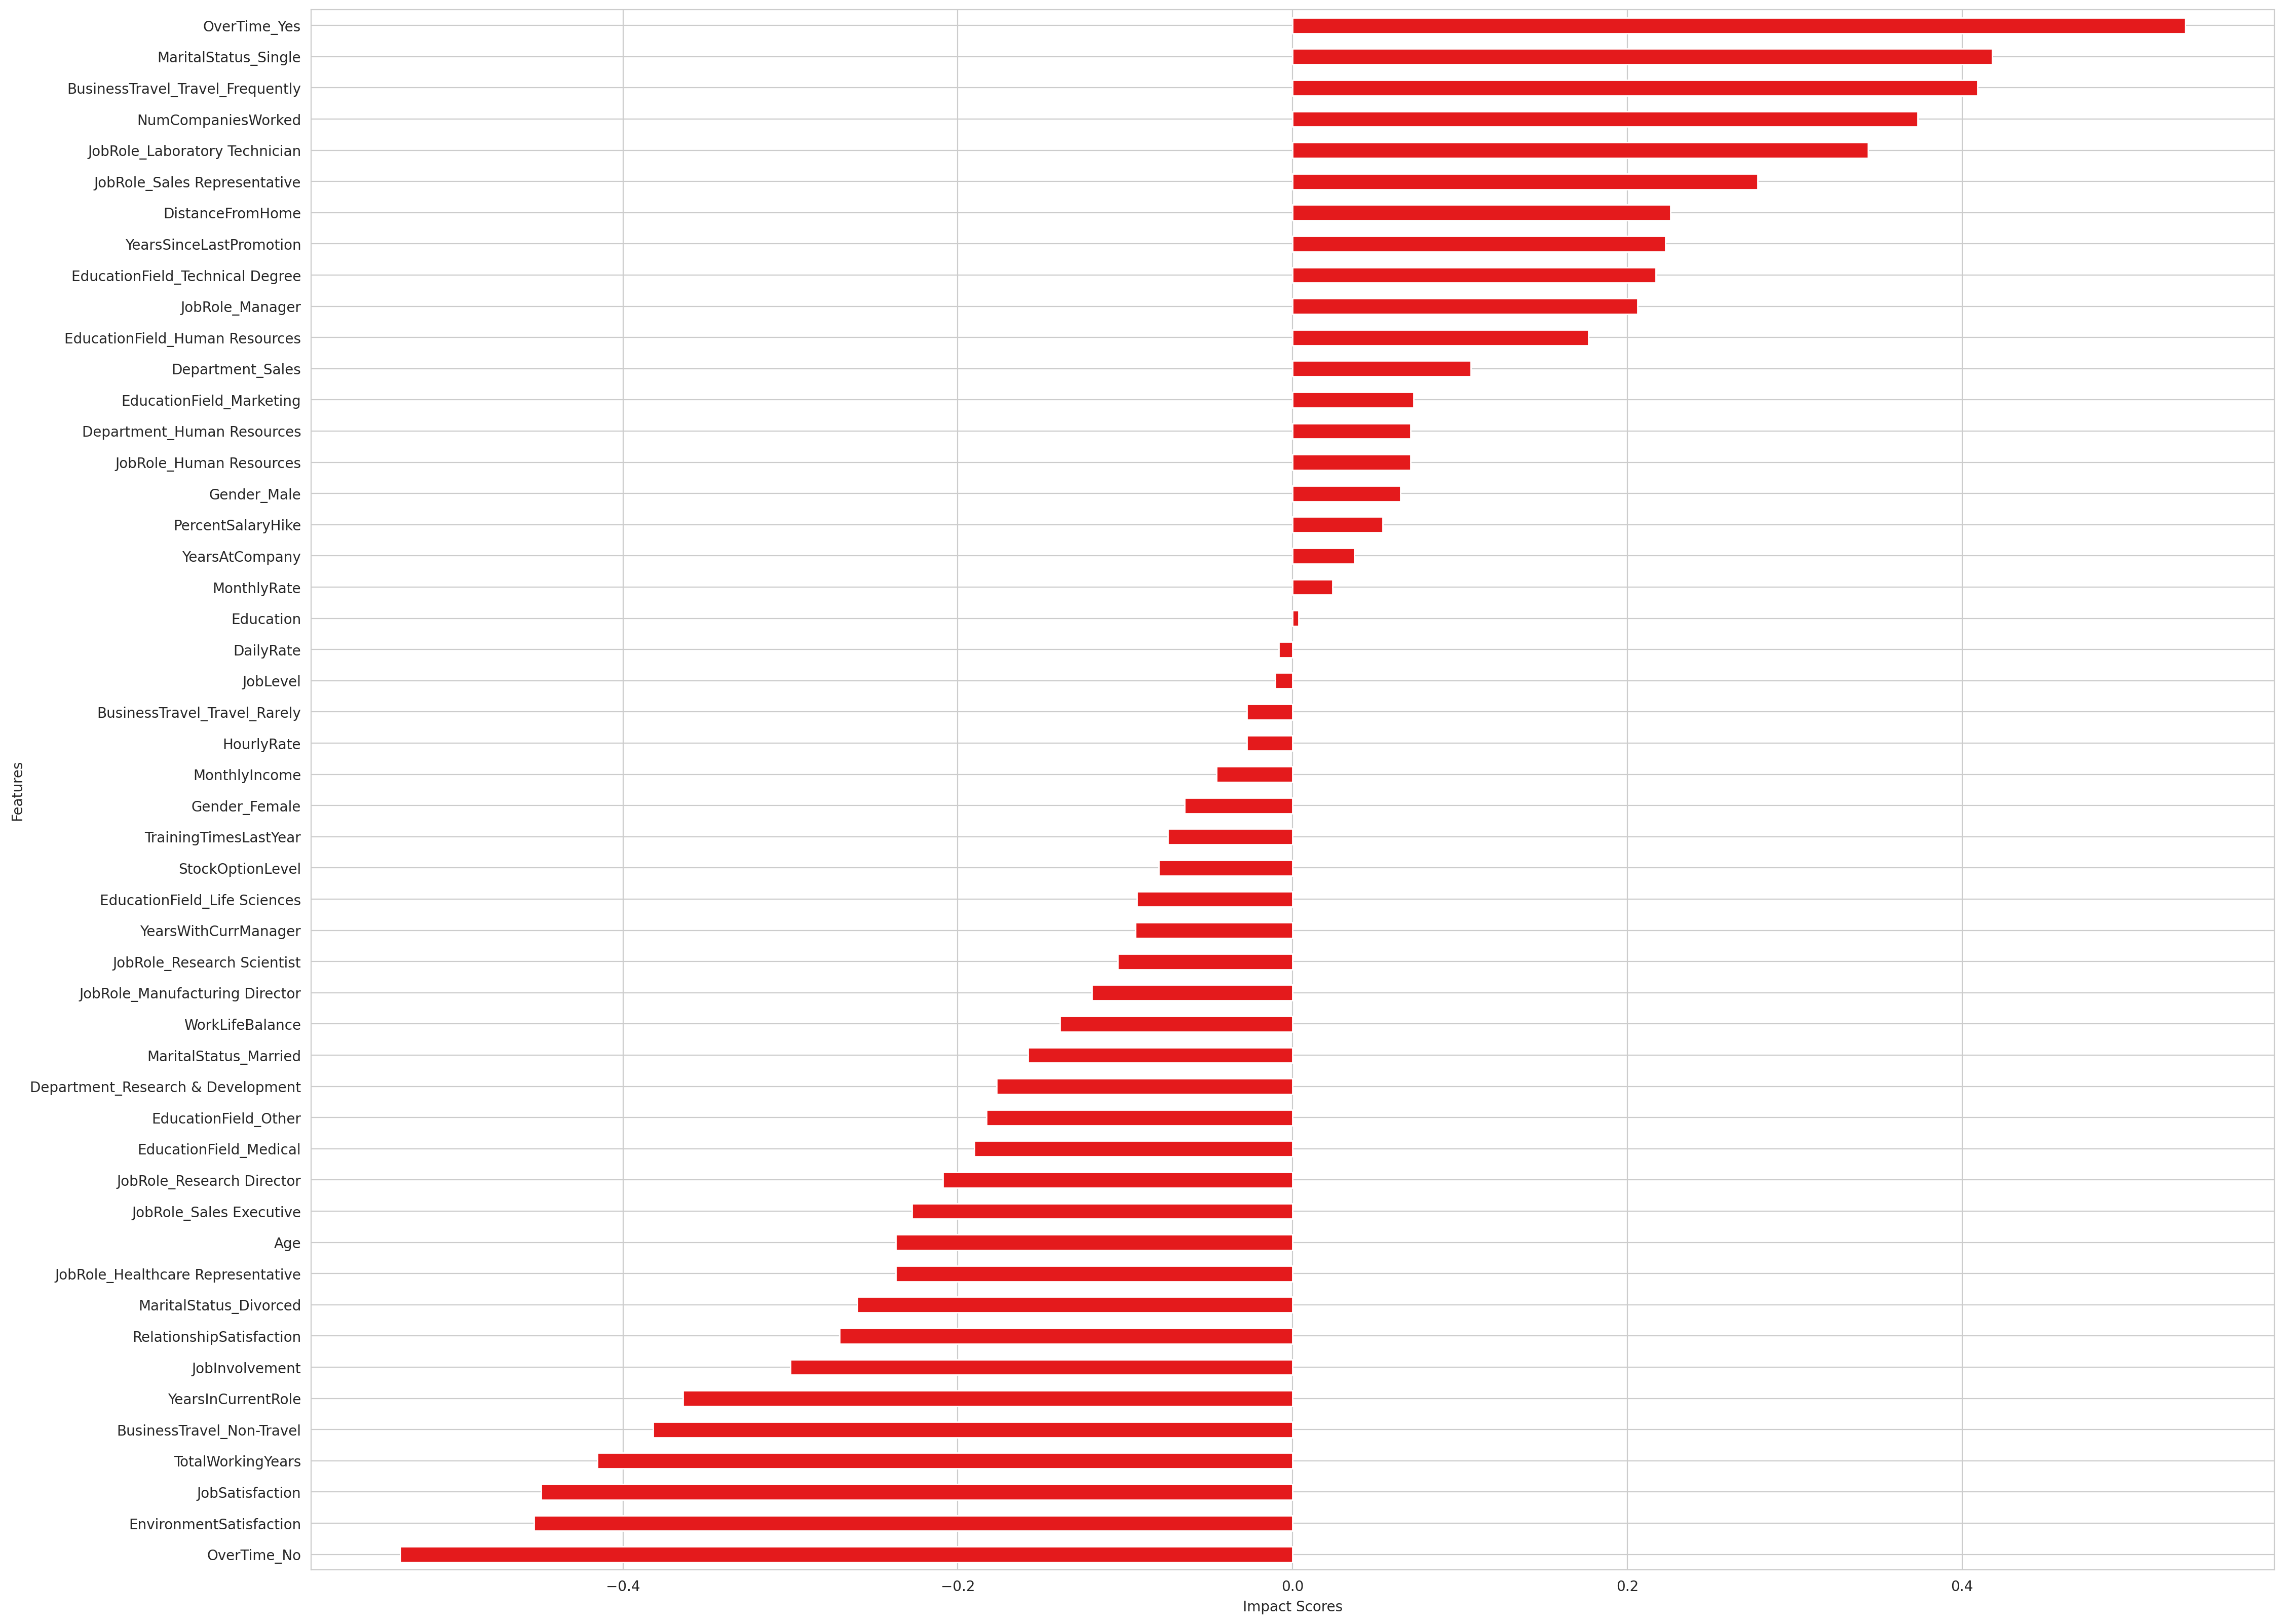

In [61]:
feature_importance = feature_impact.copy()
feature_importance.sort(key=lambda x: x[1], reverse=True)
keys = [k[1] for k in feature_importance ] [::-1]
values = [k[0] for k in feature_importance ][::-1]
feature_importance = pd.Series(keys, index=values)
print(feature_importance,'\n')
feature_importance.plot(kind='barh')
plt.rcParams['figure.figsize'] = [25, 15]
plt.xlabel('Impact Scores')
plt.ylabel('Features')
plt.show()


**Get top 10 feature impact**

In [55]:
feature_importance = feature_impact.copy()
feature_importance.sort(key=lambda x: abs(x[1]), reverse=True)
feature_importance_top_10 = feature_importance[:10]
print(pd.Series(feature_importance_top_10))

0                   (OverTime_No, -0.5331703992331602)
1                   (OverTime_Yes, 0.5331703992331602)
2      (EnvironmentSatisfaction, -0.45324385640855386)
3              (JobSatisfaction, -0.44885659934739486)
4           (MaritalStatus_Single, 0.4181186400358772)
5             (TotalWorkingYears, -0.4154653680665784)
6    (BusinessTravel_Travel_Frequently, 0.409202880...
7     (BusinessTravel_Non-Travel, -0.3819329134690802)
8             (NumCompaniesWorked, 0.3733557681545831)
9            (YearsInCurrentRole, -0.3642465146007524)
dtype: object


***Feature Importance Graph***

YearsInCurrentRole                  0.364247
NumCompaniesWorked                  0.373356
BusinessTravel_Non-Travel           0.381933
BusinessTravel_Travel_Frequently    0.409203
TotalWorkingYears                   0.415465
MaritalStatus_Single                0.418119
JobSatisfaction                     0.448857
EnvironmentSatisfaction             0.453244
OverTime_Yes                        0.533170
OverTime_No                         0.533170
dtype: float64 



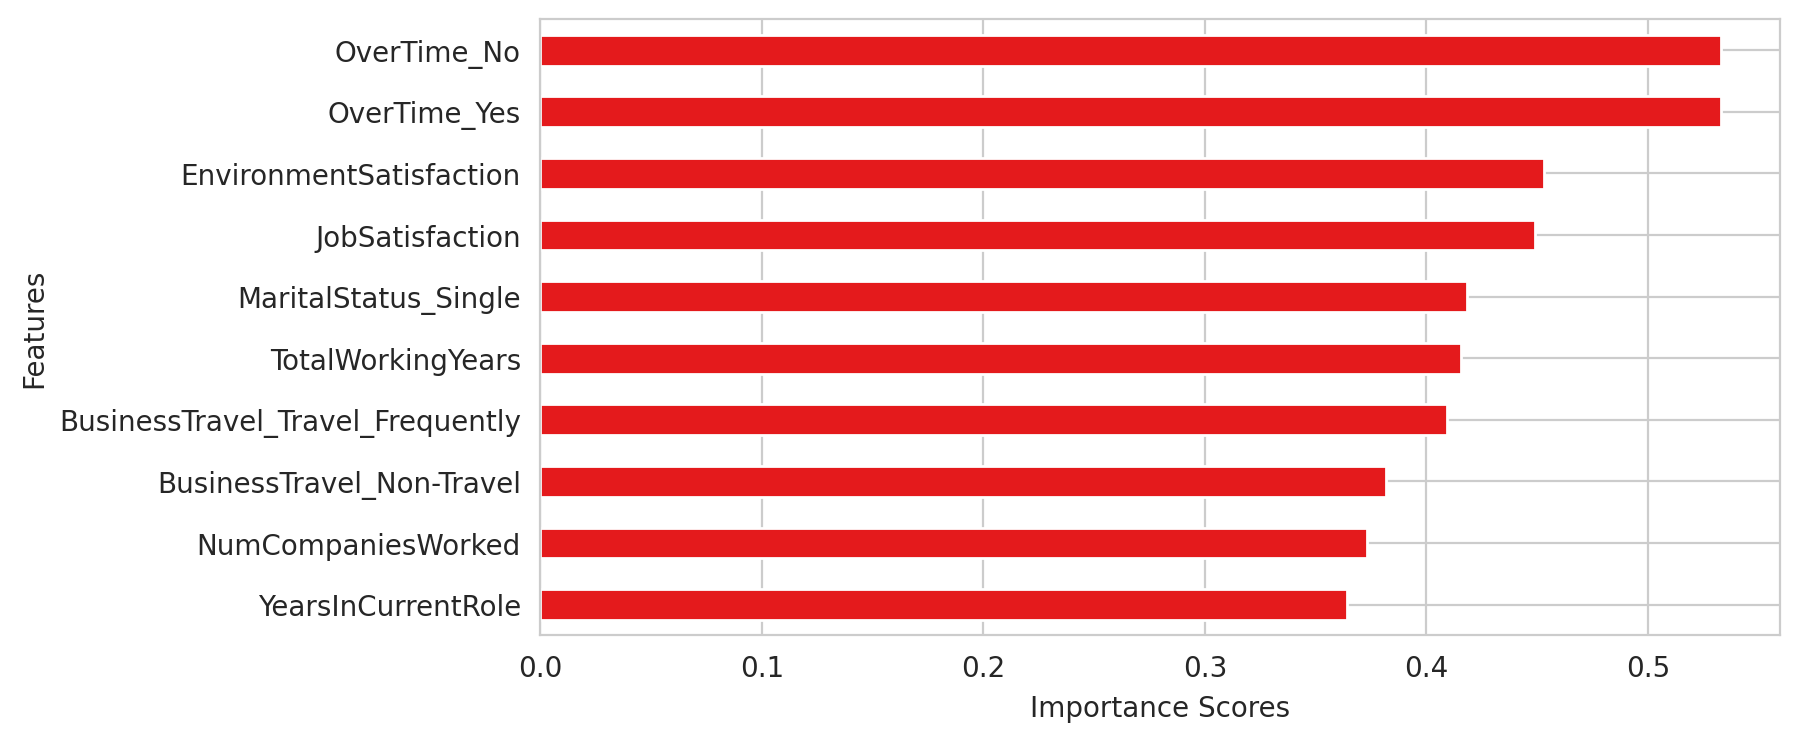

In [56]:
keys = [abs(k[1]) for k in feature_importance_top_10 ] [::-1]
values = [k[0] for k in feature_importance_top_10 ][::-1]
feature_importance_top_10 = pd.Series(keys, index=values)
plt.rcParams['figure.figsize'] = [8, 4]

print(feature_importance_top_10,'\n')
feature_importance_top_10
feature_importance_top_10.plot(kind='barh')
plt.xlabel('Importance Scores')
plt.ylabel('Features')
plt.show()